<img src='./DADOS/logo-enem.png'>

# 1 Introdução

<i>Esta é uma análise feita como desafio final para o programa de cursos de "Big Data Science", da empresa Semantix e tem por objetivo demonstrar algumas habilidades desenvolvidas e treinadas no curso. Para maior detalhes sobre as intrepretações, veja o arquivo "Relatório_Enem2019" disponível neste mesmo repositório </i>

Em 1998 o governo federal do Brasil criou o Exame Nacional do Ensino Médio (ENEM) como um instrumento para avaliar o desempenho dos estudantes no término da educação básica. A partir de 2009 medidas governamentais estimularam o uso do ENEM não apenas como um processo de avaliação do Ensino Médio, mas como forma de acesso ao ensino superior no Brasil, passando a ser adotado em diversas universidades como nota de acesso. 

O INEP disponibiliza os dados por meio dos microdados do Enem (https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem), que é a base que iremos utiliza. A partir das análises dos dados é possível observar o desempenho tanto do estudante quanto das instituições e, assim, calcular indicadores de qualidade que, dentro de um contexto, oportunizarão decisões de melhorias do processo de ensino e aprendizagem.

Dito isso, em nossa análise objetivamos identificar padrões, tendências e oportunidades para habilitar tomadores de decisão (governantes, executivos, coordenadores e demais) com insumos para a tomada de decisões baseadas em dados (mais assertivas e ágeis) na busca de melhoria na educação nacional.



# 2 Processamento dos dados

Iremos executar algumas etapas de processamento dos dados conforme necessidade. Então você pode encontrar outros passos de limpeza, feature engineering e modelagem de dados nas celulas que forem necessárias.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

Note que o padrão de codificação do arquivo provido pelo MEC é diferente do padrão do pandas. Por isso, vamos explicitar o padrão que queremos.

In [125]:
#Carregando o dataset
Enem = pd.read_csv("./DADOS/MICRODADOS_ENEM_2019.csv", sep=';', encoding='ISO-8859-1')

#Configurando opção para melhor visualização
pd.set_option('display.max_columns', None)
Enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,1,2914802.0,Itabuna,29.0,BA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3552205,Sorocaba,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,1,2910800.0,Feira de Santana,29.0,BA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,1,2304400.0,Fortaleza,23.0,CE,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2304400,Fortaleza,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,1,1721000.0,Palmas,17.0,TO,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1721000,Palmas,17,TO,1,1,1,1,504.0,510.0,513.0,516.0,483.8,503.6,537.3,392.0,BACCEEBEECDBEDDAEECDEDEADEBBCDBCAACADEEACCBBD,AECEDADAABAADBAADAEBACBAECCDAEADCDBBECCEDABCD,99999AAABEBBCCBDCAEECADBACAADAECCCDCCBAEBDEEEA...,DDBBBBCDCCDCAECCBBECDAEBADCD..CABCCECAEBDBBDA,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,120.0,120.0,100.0,0.0,460.0,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,1,3118601.0,Contagem,31.0,MG,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0

Percebemos que existem muitas colunas que talvez não agreguem informações relevantes e diminuem o tempo de processamente. Para lidar com isso, vamos dividir nosso dataset somente naquelas colunas que queremos analisar por enquanto.

In [126]:
#Filtrando o dataframe 
Enem_filtrado =Enem[['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q005', 'Q006', 'Q025']]

#Dando uma olhada no resultado
Enem_filtrado.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q025
0,SP,36.0,M,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,2,A,B
1,BA,23.0,M,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,4,C,B
2,CE,39.0,F,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,2,B,B
3,TO,25.0,F,1,1,NaN,NaN,483.8,503.6,537.3,392.0,460.0,C,E,4,E,B
4,MG,22.0,F,1,1,NaN,NaN,513.6,575.5,570.7,677.0,860.0,E,E,3,G,B


Agora, vamos iniciar o processo de ganhar intuição sobre os dados e verificar suas principais características.

In [127]:
# Para facilitar o trabalho e enxergar tudo de maneira organizada e resumida, vamos definir uma função:

def info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('TIPOS DE DADOS POR FEATURE:')
    print(data.info())
    print('\n', '-'*50)
    print('NÚMERO DE VALORES ÚNICOS POR FEATURE \n')
    print(data.nunique())
    print('\n', '-'*50)
    print('VALORES NULOS POR FEATURE')
    print(data.isnull().sum().sort_values(ascending=False))
    print('\n', '-'*50)
    print('ESTATÍSTICAS BÁSICAS')
    print(data.describe())

In [128]:
#Utilizando a função que criamos
info(Enem_filtrado)

DATASET SHAPE:  (5095270, 17) 

--------------------------------------------------
TIPOS DE DADOS POR FEATURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SG_UF_RESIDENCIA        object 
 1   NU_IDADE                float64
 2   TP_SEXO                 object 
 3   TP_COR_RACA             int64  
 4   TP_ESCOLA               int64  
 5   TP_DEPENDENCIA_ADM_ESC  float64
 6   TP_LOCALIZACAO_ESC      float64
 7   NU_NOTA_CN              float64
 8   NU_NOTA_CH              float64
 9   NU_NOTA_LC              float64
 10  NU_NOTA_MT              float64
 11  NU_NOTA_REDACAO         float64
 12  Q001                    object 
 13  Q002                    object 
 14  Q005                    int64  
 15  Q006                    object 
 16  Q025                    object 
dtypes: float64(8), int64(3), object(6)
memory usage: 660.9+ MB
None

 --

Em um primeiro momento, vamos excluir as linhas com valores nulos, para não prejudicar a análise. Vamos usar somente entradas de alunos que tem notas para todas as provas.

In [129]:
#Processando os dados. Excluindo as linahs que não nos tem serventia
Enem_filtrado.dropna(
subset = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'],
inplace = True)
info(Enem_filtrado)

DATASET SHAPE:  (3702007, 17) 

--------------------------------------------------
TIPOS DE DADOS POR FEATURE:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3702007 entries, 3 to 5095264
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SG_UF_RESIDENCIA        object 
 1   NU_IDADE                float64
 2   TP_SEXO                 object 
 3   TP_COR_RACA             int64  
 4   TP_ESCOLA               int64  
 5   TP_DEPENDENCIA_ADM_ESC  float64
 6   TP_LOCALIZACAO_ESC      float64
 7   NU_NOTA_CN              float64
 8   NU_NOTA_CH              float64
 9   NU_NOTA_LC              float64
 10  NU_NOTA_MT              float64
 11  NU_NOTA_REDACAO         float64
 12  Q001                    object 
 13  Q002                    object 
 14  Q005                    int64  
 15  Q006                    object 
 16  Q025                    object 
dtypes: float64(8), int64(3), object(6)
memory usage: 508.4+ MB
None

 --

# 3 Análise descritiva dos dados


### 3.1 Análise de variáveis categóricas 

Para performar as primeiras análises, não precisamos nos preocupar com os outros valores nulos, por enquanto. Então, vamos começar a explorar nosso dataset visualizando suas variáveis categóricas.

Text(0, 0.5, 'Quantidade de alunos')

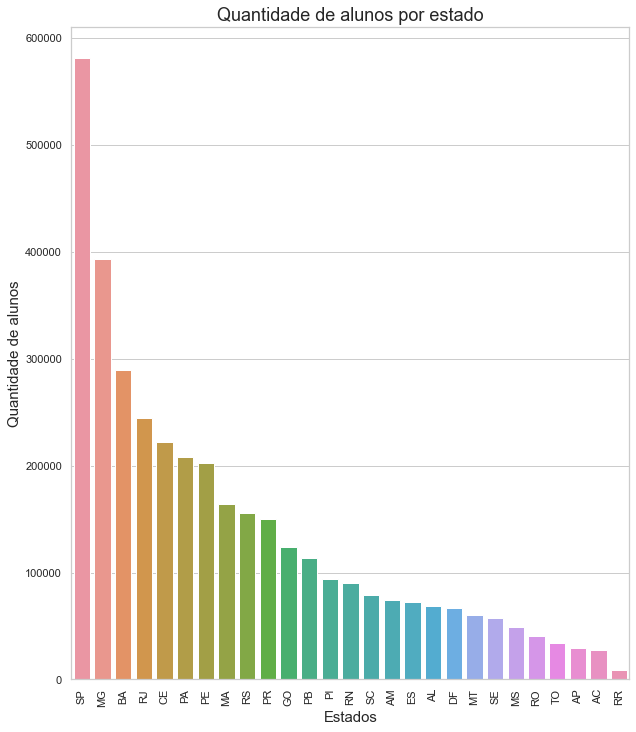

In [130]:
#Configurações de estilo
sns.set_style('whitegrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(10,12))
plt.xticks(rotation=90)

#Gerando o gráfico
ax = sns.countplot(data=Enem_filtrado, 
                 x='SG_UF_RESIDENCIA',  
                 order=Enem_filtrado['SG_UF_RESIDENCIA'].value_counts().index,
                )
ax.set_title('Quantidade de alunos por estado', fontsize=18)
ax.set_xlabel('Estados', fontsize=15)
ax.set_ylabel('Quantidade de alunos', fontsize=15)    



In [182]:
sudeste = Enem_filtrado[(Enem_filtrado['SG_UF_RESIDENCIA'] == 'SP') | (Enem_filtrado['SG_UF_RESIDENCIA'] == 'MG') | (Enem_filtrado['SG_UF_RESIDENCIA'] == 'RJ') | (Enem_filtrado['SG_UF_RESIDENCIA'] == 'ES')]
sudeste_no_brasil = (sudeste.value_counts().sum())/(Enem_filtrado['SG_UF_RESIDENCIA'].value_counts().sum())

print('A região Sudeste representa {:.2f} % dos participantes do Enem'.format(sudeste_no_brasil*100))

A região Sudeste representa 28.96 % dos participantes do Enem


Percebemos que os estados da região sudeste concentram a maior quantidade de alunos que fizeram as provas.

as mulheres representam 59.46% dos candidatos


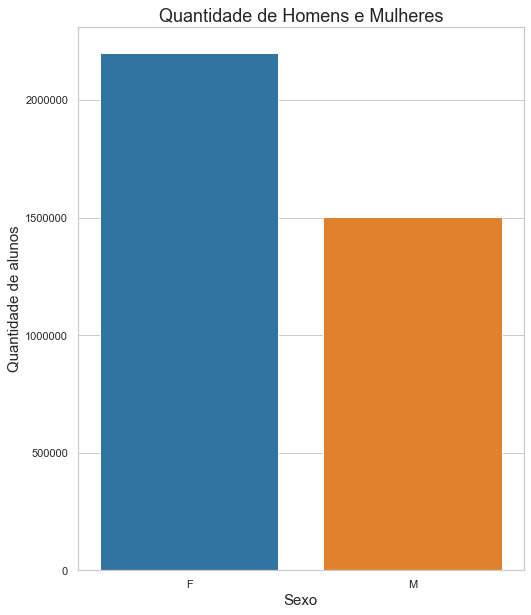

In [132]:
#Configurações de estilo
sns.set_style('whitegrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(8,10))
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica

#Gerando o gráfico
ax = sns.countplot(data=Enem_filtrado, 
                 x='TP_SEXO',  
                 order=Enem_filtrado['TP_SEXO'].value_counts().index,
                )
ax.set_title('Quantidade de Homens e Mulheres', fontsize=18)
ax.set_xlabel('Sexo', fontsize=15)
ax.set_ylabel('Quantidade de alunos', fontsize=15) 

porcentagem_mulheres = (Enem_filtrado['TP_SEXO'].value_counts()[0])/(Enem_filtrado['TP_SEXO'].value_counts().sum())
print('as mulheres representam {:.2f}% dos candidatos'.format(porcentagem_mulheres*100))

In [133]:
#Criando um dicionário para fazer as legendas
dicionario_escolaridade = {'A':'Nunca estudou',
                   'B':'Não completou a 4ª série/5º ano do EF',
                   'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do EF',
                   'D':'Completou a 8ª série/9º ano do EF, mas não completou o EM',
                   'E':'Completou o EM, mas não completou a Faculdade',
                   'F':'Completou a Faculdade, mas não completou a Pós-graduação',
                   'G':'Completou a Pós-graduação',
                   'H':'Não sabe'}

#Transformando o dicinário para o formato texto, para podermos usar no gráfico propriamente.
dicionario_escolaridade_texto = ''
for key,value in dicionario_escolaridade.items():
    dicionario_escolaridade_texto = dicionario_escolaridade_texto + "{key}: {value}\n".format(key=key, value=value)

Agora que temos a informação processada, vamos visualizar

Text(0.15, 0.7, 'A: Nunca estudou\nB: Não completou a 4ª série/5º ano do EF\nC: Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do EF\nD: Completou a 8ª série/9º ano do EF, mas não completou o EM\nE: Completou o EM, mas não completou a Faculdade\nF: Completou a Faculdade, mas não completou a Pós-graduação\nG: Completou a Pós-graduação\nH: Não sabe\n')

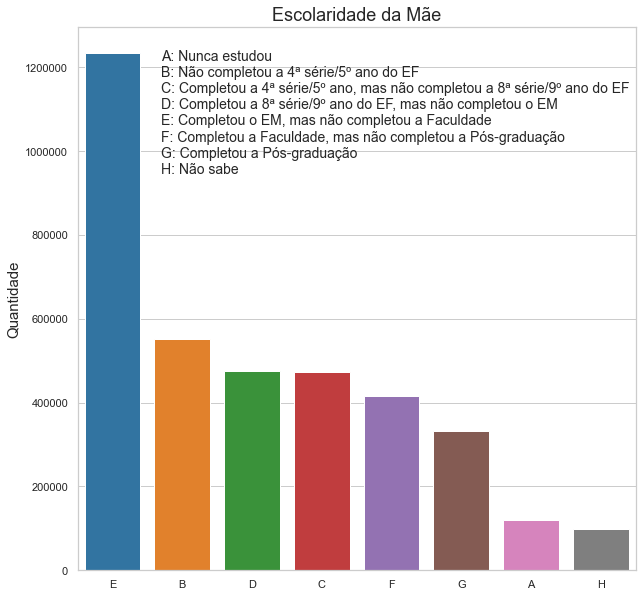

In [134]:
# Configurações de visualização
fig = plt.figure(figsize=(10,10))
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica

#Gerando o gráfico
ax = sns.countplot(data=Enem_filtrado, 
                 x='Q002',  
                 order=Enem_filtrado['Q002'].value_counts().index,
                )
ax.set_title('Escolaridade da Mãe', fontsize=18)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Quantidade', fontsize=15)    
ax.text(0.15,0.7, dicionario_escolaridade_texto, transform=ax.transAxes, fontsize=14)


Text(0.15, 0.7, 'A: Nunca estudou\nB: Não completou a 4ª série/5º ano do EF\nC: Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do EF\nD: Completou a 8ª série/9º ano do EF, mas não completou o EM\nE: Completou o EM, mas não completou a Faculdade\nF: Completou a Faculdade, mas não completou a Pós-graduação\nG: Completou a Pós-graduação\nH: Não sabe\n')

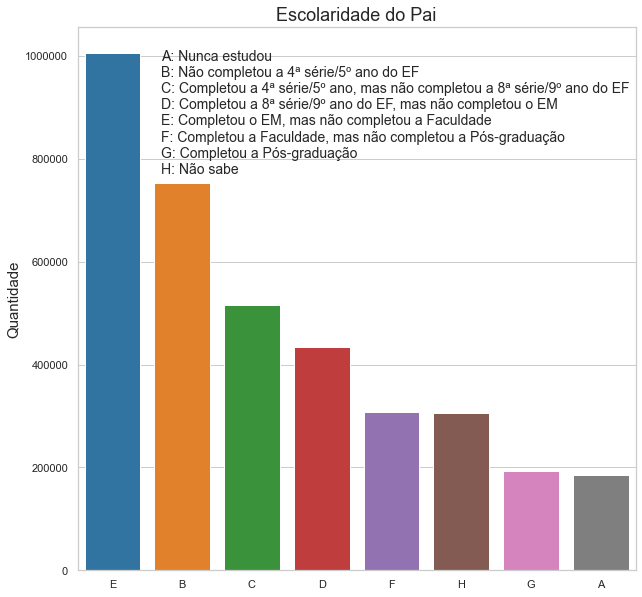

In [135]:
# Configurações de visualização
fig = plt.figure(figsize=(10,10))
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica

#Gerando o gráfico
ax = sns.countplot(data=Enem_filtrado, 
                 x='Q001',  
                 order=Enem_filtrado['Q001'].value_counts().index,
                )
ax.set_title('Escolaridade do Pai', fontsize=18)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Quantidade', fontsize=15)
ax.text(0.15,0.7, dicionario_escolaridade_texto, transform=ax.transAxes, fontsize=14)


Note que a quantidade de respostas "Não sei" é maior nos pais do que nas mães. Isso pode ter várias explicações sociais, como por exemplo: Pais que abandonam os filhos, etc.

Agora vamos analisar a quantidade de moradores por residência. Para facilitar a visualização, separamos em 2 grupos: alunos com 1 a 10 moradores, alunos com 11 a 19 moradores na mesma residência.

Text(0, 0.5, 'Frequência de respostas')

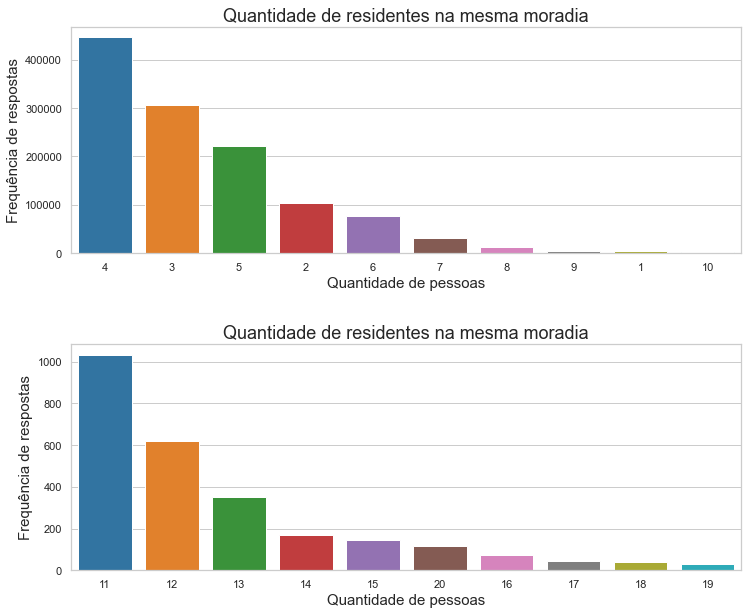

In [183]:
#Dividindo nosso banco de dados para fazer a visualização
data_quantidade_pessoas_01a10 = Enem_filtrado[Enem_filtrado['Q005'] < 11]
data_quantidade_pessoas_11a19 = Enem_filtrado[Enem_filtrado['Q005'] > 10]

#Configurações de visualização
fig, axes = plt.subplots(2,1,figsize=(12,10))
plt.subplots_adjust(hspace = 0.4)

                 
#Gerando o gráfico
ax = sns.countplot(ax=axes[0],
                 data=Enem_filtrado, 
                 x='Q005',  
                 order=data_quantidade_pessoas_01a10['Q005'].value_counts().index,
                )
ax.set_title('Quantidade de residentes na mesma moradia', fontsize=18)
ax.set_xlabel('Quantidade de pessoas', fontsize=15)
ax.set_ylabel('Frequência de respostas', fontsize=15)  
ax.ticklabel_format(style='plain', axis='y') #retirando a notação científica


#Gerando o gráfico
ax2 = sns.countplot(ax=axes[1],
                 data=Enem_filtrado, 
                 x='Q005',  
                 order=data_quantidade_pessoas_11a19['Q005'].value_counts().index,
                )
ax2.set_title('Quantidade de residentes na mesma moradia', fontsize=18)
ax2.set_xlabel('Quantidade de pessoas', fontsize=15)
ax2.set_ylabel('Frequência de respostas', fontsize=15)   

Pelos gráficos observamos que a maioria dos alunos vivem em uma casa com 4 pessoas, seguidos por aqueles que vivem em uma casa com 3 pessoas.

Vamos agora analisar a renda familiar

In [137]:
#Criando um dicionário para fazer as legendas
dicionario_renda = {'A':'Nenhuma renda',
                   'B':'Até R$ 998,00',
                   'C':'De R$ 998,01 até R$ 1.497,00',
                   'D':'De R$ 1.497,01 até R$ 1.996,00',
                   'E':'De R$ 1.996,01 até R$ 2.495,00',
                   'F':'De R$ 2.495,01 até R$ 2.994,00',
                   'G':'De R$ 2.994,01 até R$ 3.992,0',
                   'H':'De R$ 3.992,01 até R$ 4.990,00',
                    'I':'De R$ 4.990,01 até R$ 5.988,00',
                    'J':'De R$ 5.988,01 até R$ 6.986,00',
                    'K':'De R$ 6.986,01 até R$ 7.984,00',
                    'L':'De R$ 7.984,01 até R$ 8.982,00',
                    'M':'De R$ 8.982,01 até R$ 9.980,00',
                    'N':'De R$ 9.980,01 até R$ 11.976,00',
                    'O':'De R$ 11.976,01 até R$ 14.970,00',
                    'P':'De R$ 14.970,01 até R$ 19.960,00',
                    'Q':'Mais de R$ 19.960,00'}

#Transformando o dicinário para o formato texto, para podermos usar no gráfico propriamente.
dicionario_renda_texto = ''
for key,value in dicionario_renda.items():
    dicionario_renda_texto = dicionario_renda_texto + "{key}: {value}\n".format(key=key, value=value)


As respostas B e C correspondem a 47.93 % das respostas


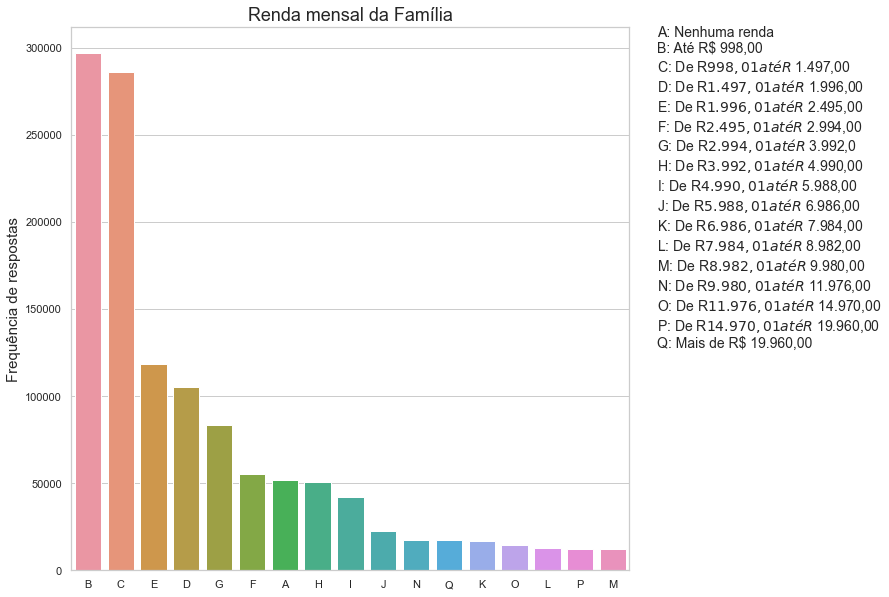

In [184]:
#Configurações de visualização
fig = plt.figure(figsize=(10,10))
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica

#Gerando o gráfico
ax = sns.countplot(data=Enem_filtrado, 
                 x='Q006',  
                 order=Enem_filtrado['Q006'].value_counts().index,
                )
ax.set_title('Renda mensal da Família', fontsize=18)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Frequência de respostas', fontsize=15)    
ax.text(1.05,0.38, dicionario_renda_texto, transform=ax.transAxes, fontsize=14)

a = (Enem_filtrado['Q006'].value_counts()[['B','C']].sum())/(Enem_filtrado['Q006'].value_counts().sum())

print('As respostas B e C correspondem a {:.2f} % das respostas'.format(a*100))

Percebemos que grande parte da população brasileira (47,93 % das respostas) vivem com até R$ 1500,00 reais, o que evidencia a concentração de renda no país.

Vamos analisar o tipo de escolar dos participantes.Segundo o dicionário fornecido pelo banco de dados, os dados possuem a seguinte legenda:

1: Não respondeu;
2: Pública;
3: Privada;

Note que a maioria dos participantes não respondeu o seu tipo de escola, talvez por esquecimento de marcar a opção. Para o nosso interesse, vamos filtrar estes dados e analisar somente dos estudantes que responderam.

In [139]:
#Filtrando o dataframe para analisar as informações de nosso interesse
Enem_filtrado = Enem_filtrado[Enem_filtrado['TP_ESCOLA'] > 1]

#Criando um dicionário para os dados
dicionario_escola = {2:'Pública',
                    3:'Privada'}

# Iterando nosso dataset para inserir o tipo de escola por extenso em casa dado
Enem_filtrado['TP_ESCOLA'] = [dicionario_escola[resp] for resp in Enem_filtrado['TP_ESCOLA']]

Text(0, 0.5, 'Frequência de respostas')

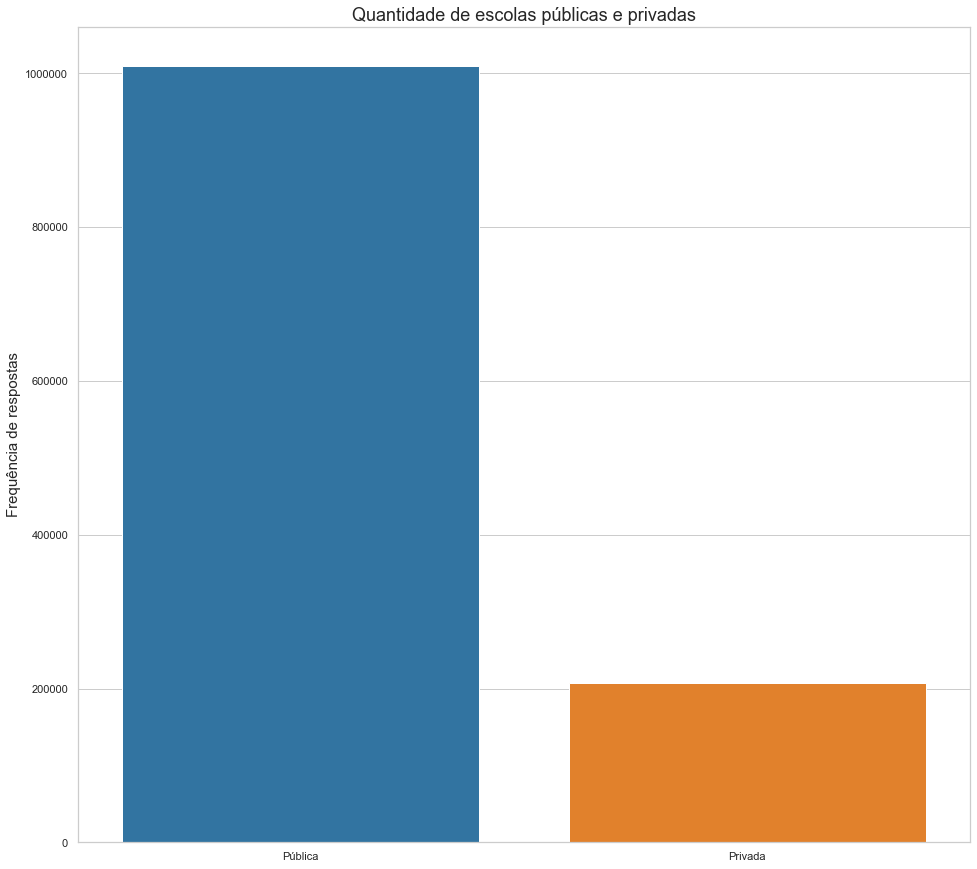

In [140]:
#Configurações de visualização
fig = plt.figure(figsize=(16,15))
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica 

#Gerando o gráfico
ax = sns.countplot(data=Enem_filtrado, 
                 x='TP_ESCOLA',  
                 order=Enem_filtrado['TP_ESCOLA'].value_counts().index,
                )
ax.set_title('Quantidade de escolas públicas e privadas', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Frequência de respostas', fontsize=15)   


Text(0, 0.5, 'Frequência de respostas')

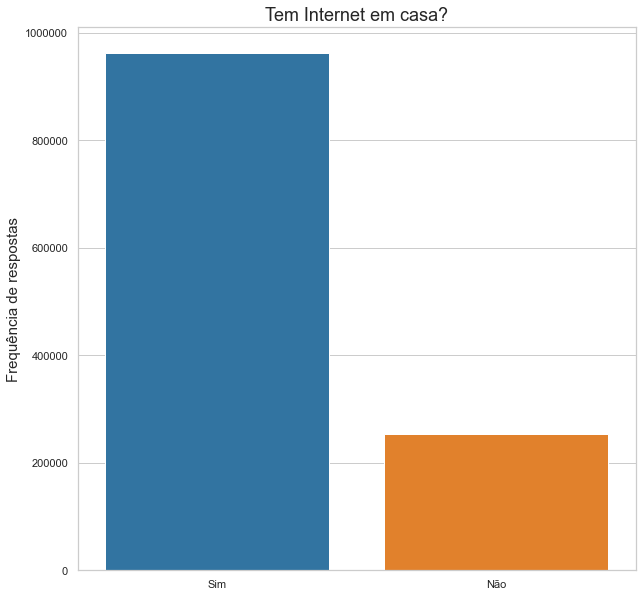

In [141]:
#Criando um dicionário para os dados
dicionario_internet = {'A':'Não',
                    'B':'Sim'}

# Iterando nosso dataset para inserir o tipo de escola por extenso em casa dado
Enem_filtrado['Q025'] = [dicionario_internet[resp] for resp in Enem_filtrado['Q025']]

#Configurações de visualização
fig = plt.figure(figsize=(10,10))
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica

#Gerando o gráfico
ax = sns.countplot(data=Enem_filtrado, 
                 x='Q025',  
                 order=Enem_filtrado['Q025'].value_counts().index,
                )
ax.set_title('Tem Internet em casa?', fontsize=18)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Frequência de respostas', fontsize=15)  

In [142]:
# Retirando os valores nulos
dado_localizacao = Enem_filtrado.dropna(subset=['TP_LOCALIZACAO_ESC'])

#Criando um dicionário para os dados
dicionario_localizacao = {1:'Urbana',
                    2:'Rural'}

# Iterando nosso dataset para inserir o tipo de escola por extenso em casa dado
dado_localizacao['TP_LOCALIZACAO_ESC'] = [dicionario_localizacao[resp] for resp in dado_localizacao['TP_LOCALIZACAO_ESC']]


Text(0, 0.5, 'Frequência de respostas')

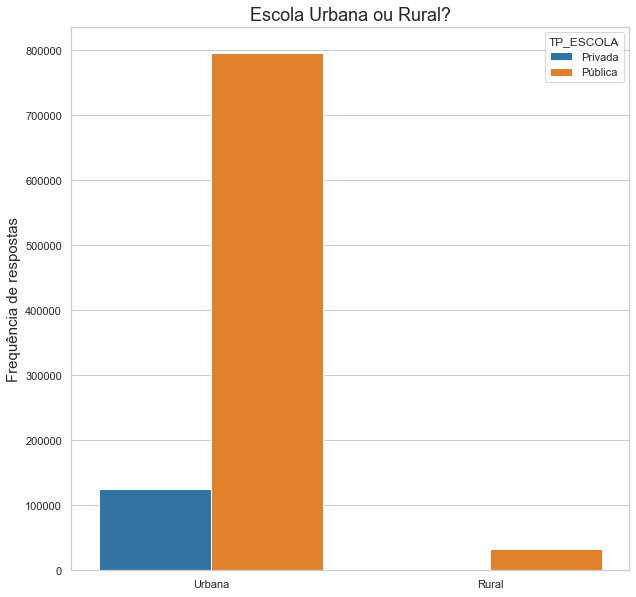

In [143]:
#Configurações de visualização
fig = plt.figure(figsize=(10,10))
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica

#Gerando o gráfico
ax = sns.countplot(data=dado_localizacao, 
                 x='TP_LOCALIZACAO_ESC',
                 hue='TP_ESCOLA',
                )
ax.set_title('Escola Urbana ou Rural?', fontsize=18)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Frequência de respostas', fontsize=15)  

In [144]:
escolas_urbanas = dado_localizacao['TP_LOCALIZACAO_ESC'].value_counts()[0]

print('As escolas urbanas representam {:.2f} % dos dados'.format((escolas_urbanas/dado_localizacao['TP_LOCALIZACAO_ESC'].value_counts().sum())*100))

dado_localizacao.groupby(by=['TP_LOCALIZACAO_ESC','TP_ESCOLA'])['NU_NOTA_MT','NU_NOTA_REDACAO'].describe()

As escolas urbanas representam 96.53 % dos dados


NU_NOTA_MT                                        \
                                  count        mean         std    min    25%   
TP_LOCALIZACAO_ESC TP_ESCOLA                                                    
Rural              Privada        777.0  552.697555  106.740441  362.2  463.5   
                   Pública      32302.0  496.174819   93.552599    0.0  422.8   
Urbana             Privada     124608.0  637.074997  117.304896    0.0  554.3   
                   Pública     796225.0  507.613003   96.250176    0.0  431.6   

                                                  NU_NOTA_REDACAO              \
                                50%    75%    max           count        mean   
TP_LOCALIZACAO_ESC TP_ESCOLA                                                    
Rural              Privada    551.6  638.2  833.8           777.0  650.862291   
                   Pública    474.9  554.6  926.8         32302.0  533.910594   
Urbana             Privada    648.2  721.3  985.5        124608.0  741.733918   
                   Pública    488.6  570.8  985.0        796225.0  560.419103   

                                                                            
                                     std  min    25%    50%    75%     max  
TP_LOCALIZACAO_ESC TP_ESCOLA                                                
Rural              Privada    162.466183  0.0  560.0  640.0  760.0   980.0  
                   Pública    194.367310  0.0  440.0  560.0  640.0   980.0  
Urbana             Privada    153.709394  0.0  640.0  760.0  860.0  1000.0  
                   Pública    183.858706  0.0  480.0  580.0  660.0  1000.0

Com a análise dos gráficos, percebemos que as escolas urbanas dominam o cenário nacional e que estas possuem médias melhores do que as escolas rurais, seja a escola privada ou pública.

### 3.2 Análise de variáveis quantitativas

Vamos fazer uma média aritmética simples para obter a nota final dos candidatos, sem considerar nenhum tipo de bonus ou peso, como ações afirmativas que existem em determinadas universidades (https://www.enembrasil.com.br/calculadora-enem/)

In [145]:
#Calculando a média de cada candidato e criando uma nova coluna para armazenar o valor
Enem_filtrado['nota_geral'] = (Enem_filtrado['NU_NOTA_MT'] 
                               + Enem_filtrado['NU_NOTA_REDACAO'] 
                               + Enem_filtrado['NU_NOTA_CH'] 
                               + Enem_filtrado['NU_NOTA_CN'] 
                               + Enem_filtrado['NU_NOTA_LC']
                              )/5

Text(0, 0.5, 'Frequência de respostas')

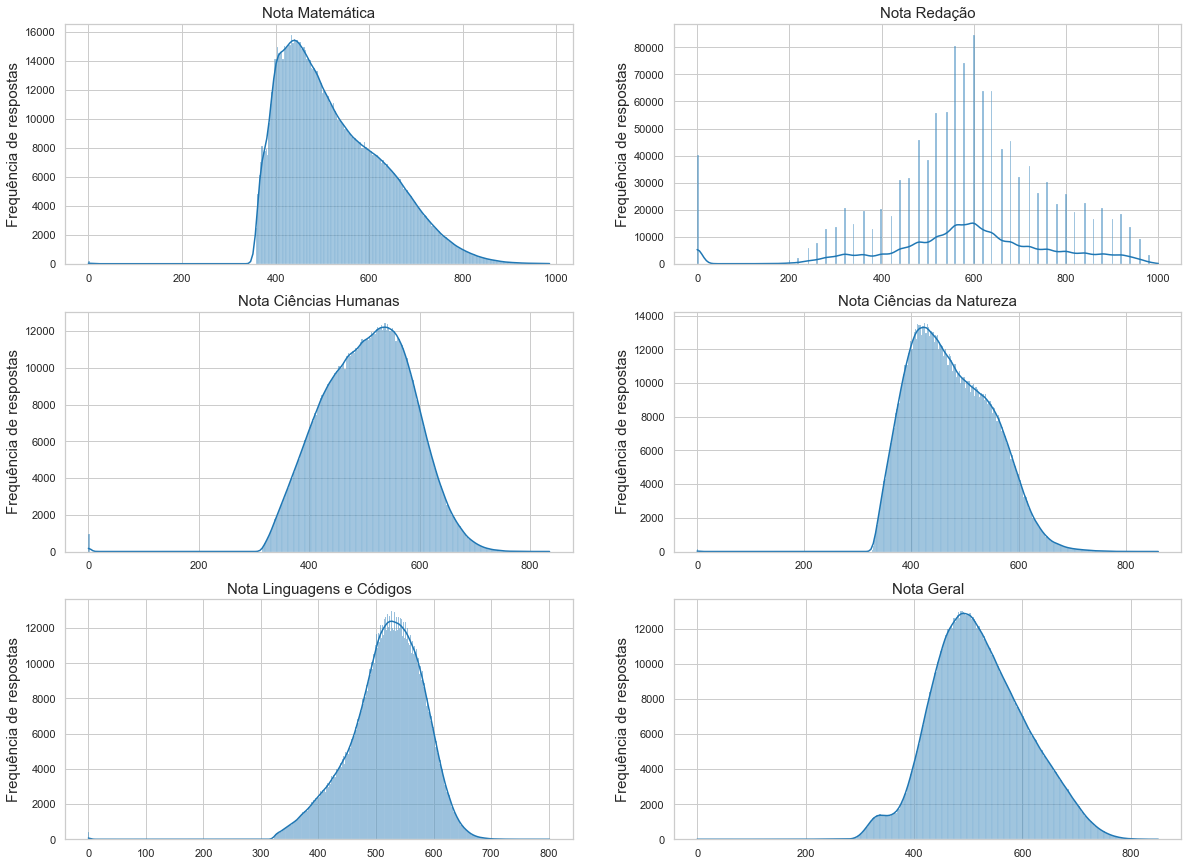

In [146]:
#Configurações de visualização
fig, axes = plt.subplots(3,2,figsize=(20,15))
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica

#Gerando o gráfico
a = sns.histplot(ax=axes[0,0],
                 data=Enem_filtrado, 
                 x='NU_NOTA_MT',
                 kde=True,
                )
a.set_title("Nota Matemática", fontsize=15)
a.set_xlabel('')
a.set_ylabel('Frequência de respostas', fontsize=15)  

b = sns.histplot(ax=axes[0,1],
                 data=Enem_filtrado, 
                 x='NU_NOTA_REDACAO',
                 kde=True,
                )
b.set_title("Nota Redação", fontsize=15)
b.set_xlabel('')
b.set_ylabel('Frequência de respostas', fontsize=15)  

c = sns.histplot(ax=axes[1,0],
                 data=Enem_filtrado, 
                 x='NU_NOTA_CH',
                 kde=True,
                )
c.set_title("Nota Ciências Humanas", fontsize=15)
c.set_xlabel('')
c.set_ylabel('Frequência de respostas', fontsize=15)  

d = sns.histplot(ax=axes[1,1],
                 data=Enem_filtrado, 
                 x='NU_NOTA_CN',
                 kde=True,
                )
d.set_title("Nota Ciências da Natureza", fontsize=15)
d.set_xlabel('')
d.set_ylabel('Frequência de respostas', fontsize=15)  

e = sns.histplot(ax=axes[2,0],
                 data=Enem_filtrado, 
                 x='NU_NOTA_LC',
                 kde=True,
                )
e.set_title("Nota Linguagens e Códigos", fontsize=15)
e.set_xlabel('')
e.set_ylabel('Frequência de respostas', fontsize=15)  

f = sns.histplot(ax=axes[2,1],
                 data=Enem_filtrado, 
                 x='nota_geral',
                 kde=True,
                )
f.set_title("Nota Geral", fontsize=15)
f.set_xlabel('')
f.set_ylabel('Frequência de respostas', fontsize=15)  

Note que, todas as distribuições tem curvas próximas da normal, exceto pelas notas de redação. Com conhecimento de área, é possível explicar este fenômeno da seguinte maneira: Dierentemente das outras notas, que são calculadas segundo o TRI (Teoria da resposta ao item), a nota da redação é calculada segundo correção de profissionais individuais, e suas notas são todas computadas em intervalos de 20 em 20 pontos, ex: 540, 560, 580, 600. 

Note que a média é a curva que mais se aproxima de uma normal, o que pode ser descrito pelo Teorema central do limite, que diz que quanto maior o tamanho da amostra, a distribuição amostral da sua média tende a uma distribuição normal. Já que temos uma amostra bem grnade, podemos ver esse teorema na prática. (https://pt.wikipedia.org/wiki/Teorema_central_do_limite)

In [147]:
#Condigurando um dataframe para manipularmos
data_boxplot = Enem_filtrado[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'nota_geral']]

#Renomeando as colunas
data_boxplot.columns = ['Ciências da natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'nota_geral']

#Descrevendo os dados
data_boxplot.describe().applymap(lambda x: f"{x:0.3f}") #Usamos o applymap para retirar a notação científica e visualizar melhor os dados

,Ciências da natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação,nota_geral
count,1217154.000,1217154.000,1217154.000,1217154.000,1217154.000,1217154.000
mean,474.332,505.987,519.045,523.982,583.566,521.382
std,75.366,80.258,63.742,108.201,190.282,85.845
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,414.300,447.000,481.500,437.200,500.000,460.980
50%,466.100,509.000,524.800,502.000,600.000,514.140
75%,530.400,564.600,564.300,597.600,700.000,578.480
max,860.900,835.100,801.700,985.500,1000.000,850.820


Text(0, 0.5, 'Nota')

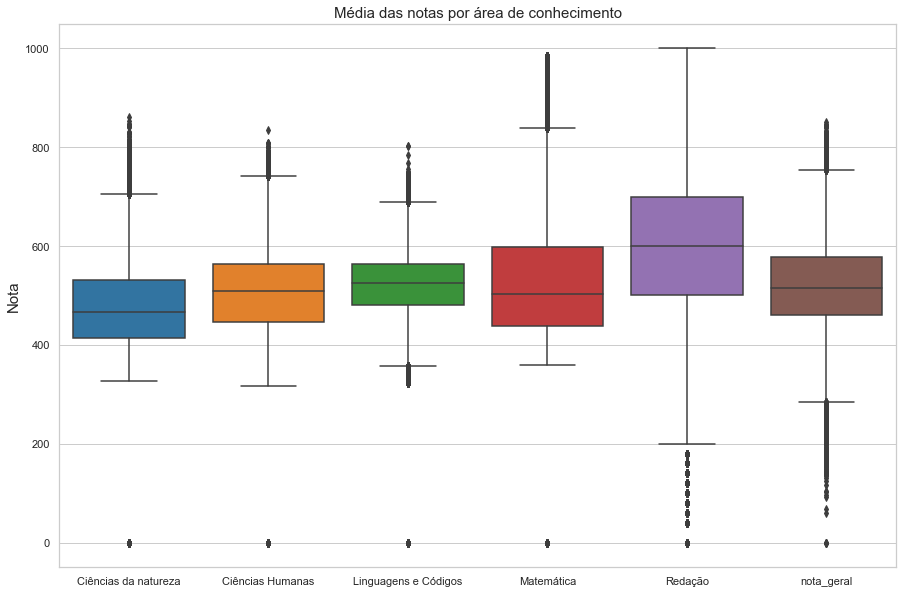

In [148]:
#"derretendo" o dataframe para termos as informações de área de conhecimento nas colunas
data_boxplot = pd.melt(data_boxplot)

#Configurações de visualização
fig = plt.figure(figsize=(15,10))
ax = sns.boxplot(x='variable', y='value', data = data_boxplot)
ax.set_title('Média das notas por área de conhecimento', fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Nota', fontsize=15)  

Note que todas as áreas de conhecimento possuem notas zero (0), o que é esperado, já que podem haver candidatos que zerem a prova. Além disso, as notas de redação possuem mais valores discrepantes justamente pelo mesmo motivo explicitado mais acima, note também que Redação tem o maior desvio padrão nas notas.

# 4.Perguntas

Vamos guiar nossa análise com base em algumas perguntas afim de identificar padrões e/ou oportunidades.

### 4.1 Quais estados/Regiões obtiveram as melhores notas?

In [149]:
#Criando um dicionario para as regiões
dicionario_regioes = {
    'SP':'Sudeste',
    'MG':'Sudeste',
    'RJ':'Sudeste',
    'ES':'Sudeste',
    'BA':'Nordeste',
    'CE':'Nordeste',
    'PE':'Nordeste',
    'MA':'Nordeste',
    'PB':'Nordeste',
    'PI':'Nordeste',
    'RN':'Nordeste',
    'AL':'Nordeste',
    'SE':'Nordeste',
    'PA': 'Norte',
    'AM': 'Norte',
    'RO': 'Norte',
    'TO': 'Norte',
    'AP': 'Norte',
    'AC': 'Norte',
    'RR': 'Norte',
    'RS': 'Sul',
    'PR': 'Sul',
    'SC': 'Sul',
    'GO': 'Centro-Oeste',
    'DF': 'Centro-Oeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
}

#Iterando no nosso dataframe e criando uma nova coluna com a informação de "Região"
Enem_filtrado['regiao'] = [dicionario_regioes[resp] for resp in Enem_filtrado.SG_UF_RESIDENCIA]


Text(0, 0.5, 'Nota média')

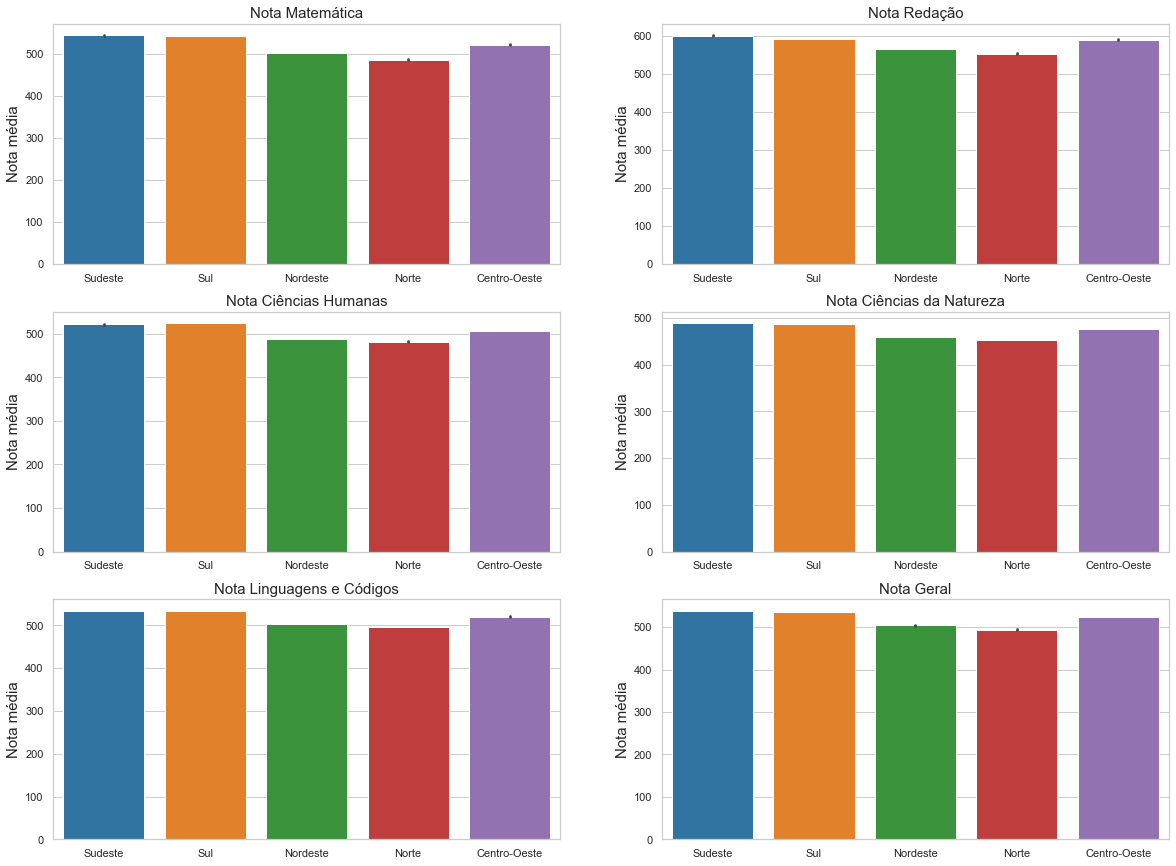

In [150]:
#Configurações de visualização
fig, axes = plt.subplots(3,2,figsize=(20,15))
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica

#Gerando o gráfico
a = sns.barplot(ax=axes[0,0],
                 data=Enem_filtrado, 
                 y='NU_NOTA_MT',
                 x='regiao',
                )
a.set_title("Nota Matemática", fontsize=15)
a.set_xlabel('')
a.set_ylabel('Nota média', fontsize=15)  

b = sns.barplot(ax=axes[0,1],
                 data=Enem_filtrado, 
                 y='NU_NOTA_REDACAO',
                 x='regiao',
                )
b.set_title("Nota Redação", fontsize=15)
b.set_xlabel('')
b.set_ylabel('Nota média', fontsize=15)  

c = sns.barplot(ax=axes[1,0],
                 data=Enem_filtrado, 
                 y='NU_NOTA_CH',
                 x='regiao',
                )
c.set_title("Nota Ciências Humanas", fontsize=15)
c.set_xlabel('')
c.set_ylabel('Nota média', fontsize=15)  

d = sns.barplot(ax=axes[1,1],
                 data=Enem_filtrado, 
                 y='NU_NOTA_CN',
                 x='regiao',
                )
d.set_title("Nota Ciências da Natureza", fontsize=15)
d.set_xlabel('')
d.set_ylabel('Nota média', fontsize=15)  

e = sns.barplot(ax=axes[2,0],
                 data=Enem_filtrado, 
                 y='NU_NOTA_LC',
                 x='regiao',
                )
e.set_title("Nota Linguagens e Códigos", fontsize=15)
e.set_xlabel('')
e.set_ylabel('Nota média', fontsize=15)  

f = sns.barplot(ax=axes[2,1],
                 data=Enem_filtrado, 
                 y='nota_geral',
                 x='regiao',
                )
f.set_title("Nota Geral", fontsize=15)
f.set_xlabel('')
f.set_ylabel('Nota média', fontsize=15)  

Pelo gráfico, percebemos que a região Sudeste concentra as melhores notas médias nas prova em todas as áreas de conhecimento, e que a região norte, por sua vez, tem as menores médias.

### 4.2 Ter pais letrados implica em algo?

Vamos analisar a relação entre o nível de escolaridade da mãe e a nota alcançada pelos filhos nos resultados da nota de Redação, Matemática e média geral, para ver se há alguma relação de casualidade. Usamos somente a escolaridade da mãe, já que temos mais dados a respeito dessa.

In [151]:
#Condigurando um dataframe para manipularmos com mais facilidade e rapidez
data_matematica = Enem_filtrado[['NU_NOTA_MT','Q006','Q002','regiao']]
data_CN = Enem_filtrado[['NU_NOTA_CN','Q006','Q002','regiao']]
data_CH = Enem_filtrado[['NU_NOTA_CH','Q006','Q002','regiao']]
data_LC = Enem_filtrado[['NU_NOTA_LC','Q006','Q002','regiao']]
data_REDACAO = Enem_filtrado[['NU_NOTA_REDACAO','Q002', 'Q006','regiao']]
data_geral = Enem_filtrado[['nota_geral','Q006','Q002','regiao']]

Text(0, 1, 'A: Nunca estudou\nB: Não completou a 4ª série/5º ano do EF\nC: Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do EF\nD: Completou a 8ª série/9º ano do EF, mas não completou o EM\nE: Completou o EM, mas não completou a Faculdade\nF: Completou a Faculdade, mas não completou a Pós-graduação\nG: Completou a Pós-graduação\nH: Não sabe\n')

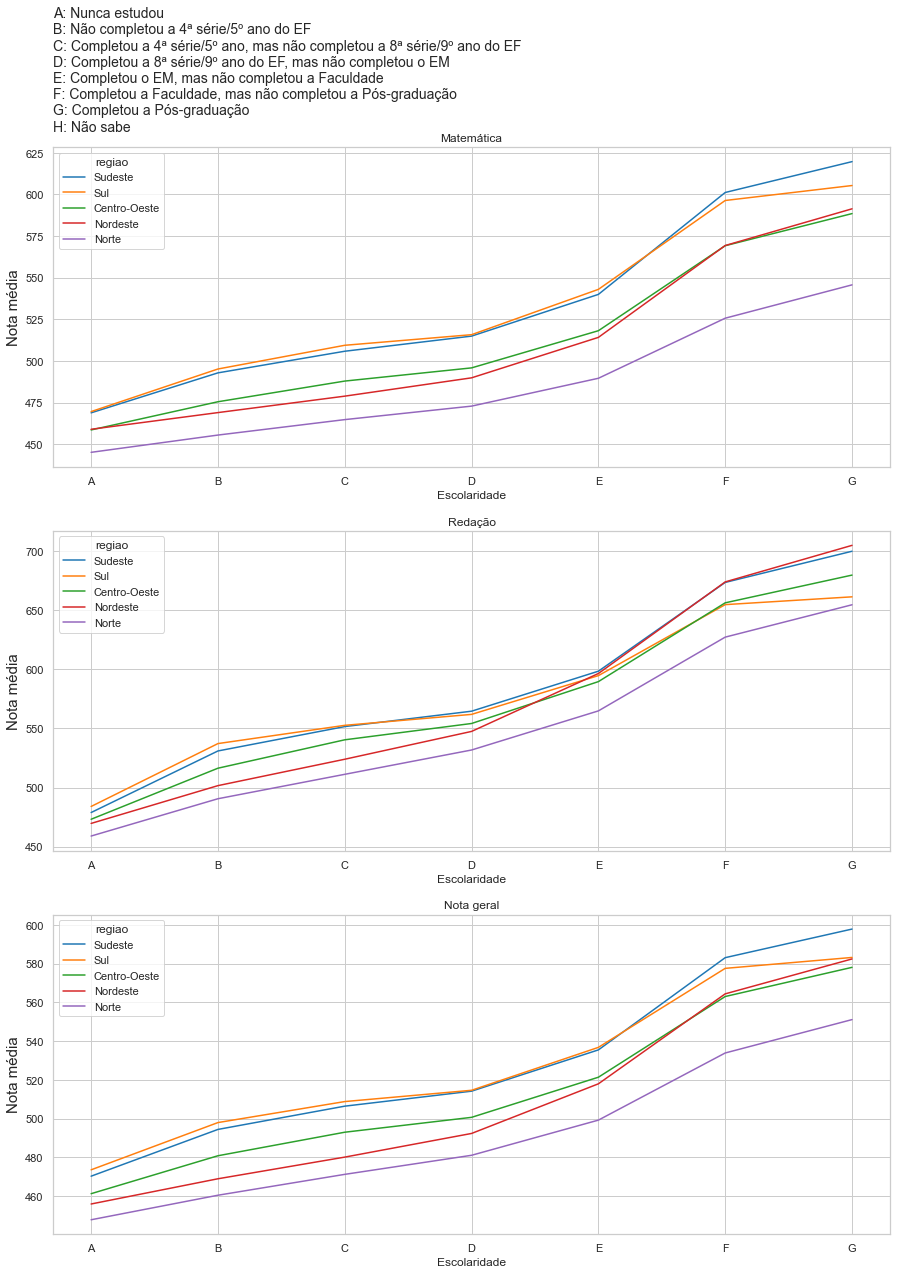

In [152]:
#Configurações de visualização
fig, axes = plt.subplots(3,1,figsize=(15,20))

#Manipulando um dataframe para usarmos
# Filtramos as respostas "H", pois estas correspondem ao "Não sei", que não é de nosso interesse manter no gráfico.
a = data_matematica.where(data_matematica['Q002'] != 'H')\
    .groupby(['Q002', 'regiao'])\
    .mean().sort_values(by='NU_NOTA_MT', ascending=True)

b = data_REDACAO.where(data_REDACAO['Q002'] != 'H')\
    .groupby(['Q002', 'regiao'])\
    .mean().sort_values(by='NU_NOTA_REDACAO', ascending=True)

c = data_geral.where(data_geral['Q002'] != 'H')\
    .groupby(['Q002', 'regiao'])\
    .mean().sort_values(by='nota_geral', ascending=True)

#Configurando o gráfico
ax1 = sns.lineplot(ax=axes[0],
                 x='Q002',
                 y='NU_NOTA_MT',
                 data = a,
                 hue='regiao',
                 hue_order=['Sudeste', 'Sul', 'Centro-Oeste', 'Nordeste', 'Norte'],
                )
ax1.set_title('Matemática')
ax1.set_xlabel('Escolaridade')
ax1.set_ylabel('Nota média', fontsize=15) 

ax2 = sns.lineplot(ax=axes[1],
                 x='Q002',
                 y='NU_NOTA_REDACAO',
                 data = b,
                 hue='regiao',
                 hue_order=['Sudeste', 'Sul', 'Centro-Oeste', 'Nordeste', 'Norte'],
                )
ax2.set_title('Redação')
ax2.set_xlabel('Escolaridade')
ax2.set_ylabel('Nota média', fontsize=15) 

ax3 = sns.lineplot(ax=axes[2],
                 x='Q002',
                 y='nota_geral',
                 data = c,
                 hue='regiao',
                 hue_order=['Sudeste', 'Sul', 'Centro-Oeste', 'Nordeste', 'Norte'],
                )
ax3.set_title('Nota geral')
ax3.set_xlabel('Escolaridade')
ax3.set_ylabel('Nota média', fontsize=15) 

ax1.text(0,1, dicionario_escolaridade_texto, transform=ax1.transAxes, fontsize=14)


Percebemos que, independente da região, as notas dos candidatos sobem à medida que a escolaridade da mãe cresce. Isso é um dado interessante que demonstra a dinâmica social no Brasil, o acesso à educação e à cultura que é discrepante dentre as classes sociais.

### 4.3 Há diferença nas notas de homens e mulheres?

Text(0, 0.5, 'Frequência de respostas')

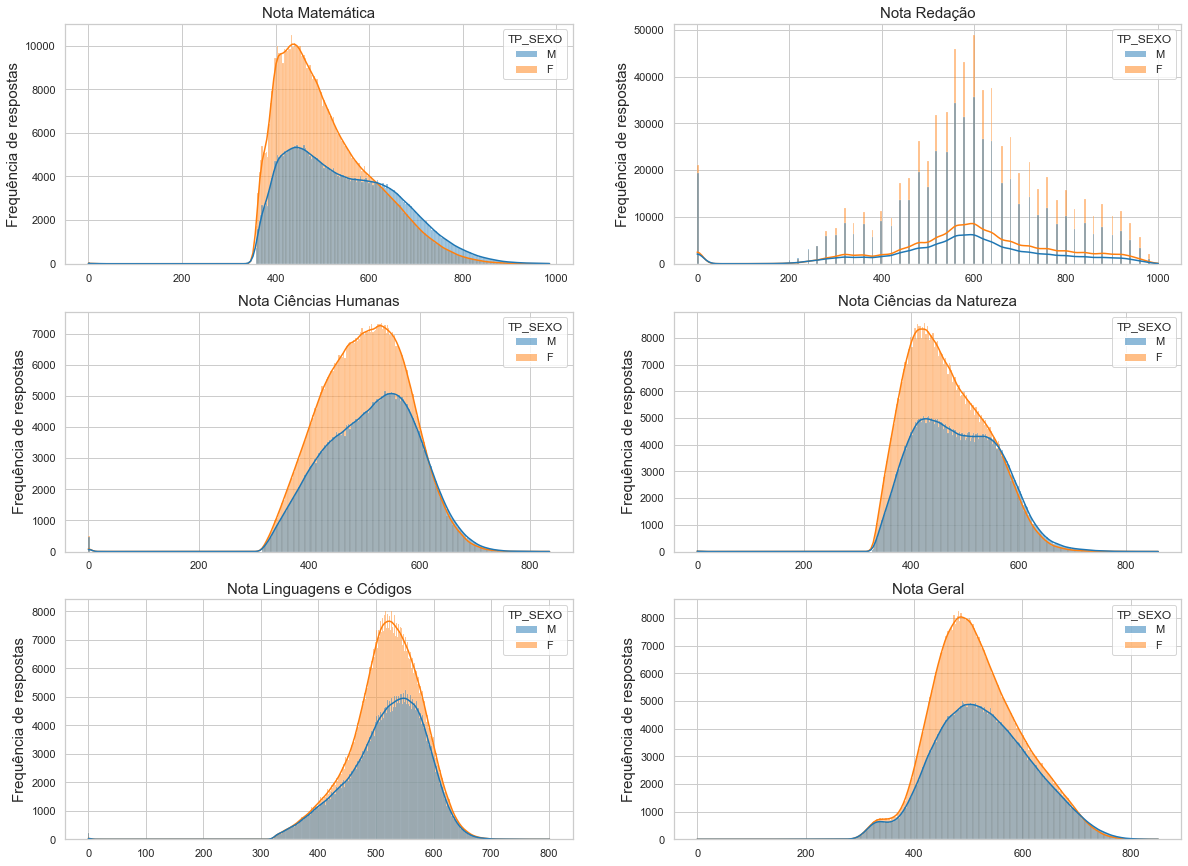

In [153]:
#Configurações de visualização
fig, axes = plt.subplots(3,2,figsize=(20,15))
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica

#Gerando o gráfico
a = sns.histplot(ax=axes[0,0],
                 data=Enem_filtrado, 
                 x='NU_NOTA_MT',
                 kde=True,
                 hue='TP_SEXO'
                )
a.set_title("Nota Matemática", fontsize=15)
a.set_xlabel('')
a.set_ylabel('Frequência de respostas', fontsize=15)  

b = sns.histplot(ax=axes[0,1],
                 data=Enem_filtrado, 
                 x='NU_NOTA_REDACAO',
                 kde=True,
                 hue='TP_SEXO'
                )
b.set_title("Nota Redação", fontsize=15)
b.set_xlabel('')
b.set_ylabel('Frequência de respostas', fontsize=15)  

c = sns.histplot(ax=axes[1,0],
                 data=Enem_filtrado, 
                 x='NU_NOTA_CH',
                 kde=True,
                 hue='TP_SEXO'
                )
c.set_title("Nota Ciências Humanas", fontsize=15)
c.set_xlabel('')
c.set_ylabel('Frequência de respostas', fontsize=15)  

d = sns.histplot(ax=axes[1,1],
                 data=Enem_filtrado, 
                 x='NU_NOTA_CN',
                 kde=True,
                 hue='TP_SEXO'
                )
d.set_title("Nota Ciências da Natureza", fontsize=15)
d.set_xlabel('')
d.set_ylabel('Frequência de respostas', fontsize=15)  

e = sns.histplot(ax=axes[2,0],
                 data=Enem_filtrado, 
                 x='NU_NOTA_LC',
                 kde=True,
                 hue='TP_SEXO'
                )
e.set_title("Nota Linguagens e Códigos", fontsize=15)
e.set_xlabel('')
e.set_ylabel('Frequência de respostas', fontsize=15)  

f = sns.histplot(ax=axes[2,1],
                 data=Enem_filtrado, 
                 x='nota_geral',
                 kde=True,
                 hue='TP_SEXO'
                )
f.set_title("Nota Geral", fontsize=15)
f.set_xlabel('')
f.set_ylabel('Frequência de respostas', fontsize=15)  



In [154]:
Enem_filtrado.groupby('TP_SEXO').mean()[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_MT', 'nota_geral']]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT,nota_geral
TP_SEXO,,,,,,
F,466.249553,501.412508,518.855922,591.316139,507.633507,517.093526
M,485.583110,512.353723,519.307806,572.777769,546.738892,527.352260


Percebemos que os homens possuem notas levemente maiores que as mulheres e todas as áreas do conhecimento e na média geral, menos na nota de redação, onde as mulheres se sobressaem.

### 4.4 Há diferença entre escolas públicas e privadas?

Text(0, 5000, 'Média grupo 1 - Federal: 591.85 \nMédia grupo 2 - Estadual: 498.19 \nMédia grupo 3 - Municipal: 523.18 \nMédia grupo 4 - Privada: 609.31')

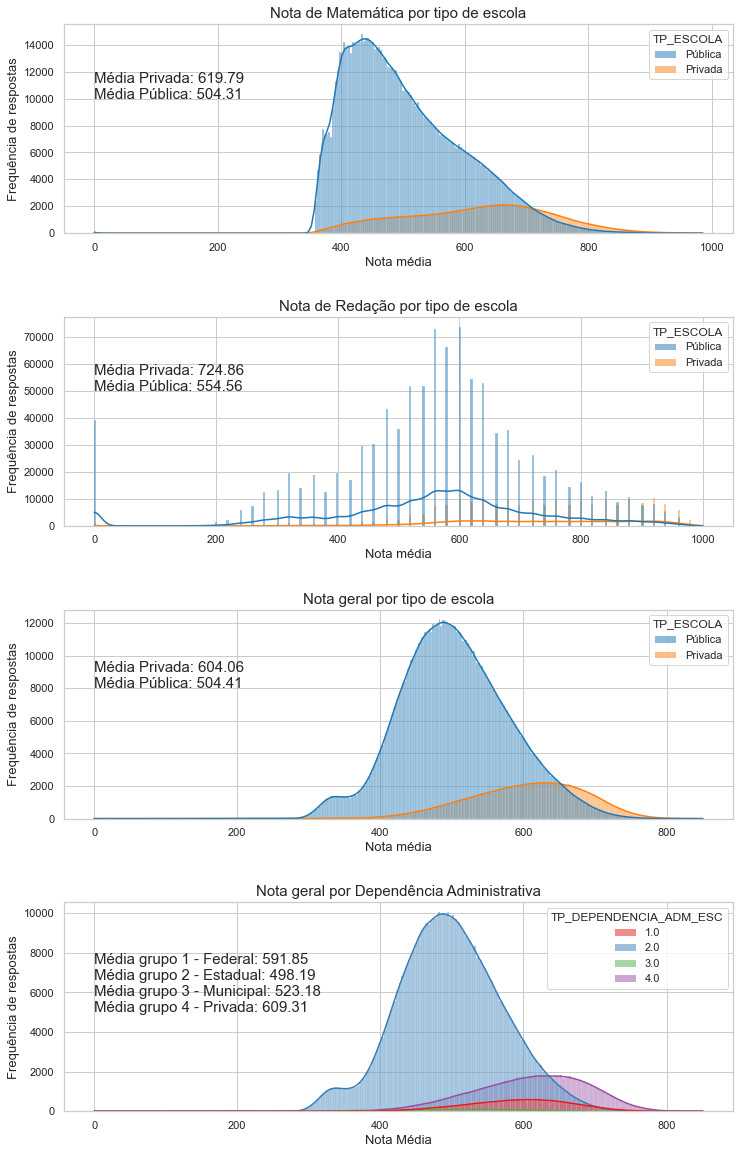

In [155]:
#Vamos calcular a média das notas para inserir no nosso gráfico
matematica = Enem_filtrado.groupby('TP_ESCOLA').mean()['NU_NOTA_MT']
redacao = Enem_filtrado.groupby('TP_ESCOLA').mean()['NU_NOTA_REDACAO']
geral = Enem_filtrado.groupby('TP_ESCOLA').mean()['nota_geral']
geral_por_adm = Enem_filtrado.groupby('TP_DEPENDENCIA_ADM_ESC').mean()['nota_geral']

#Configurações de visualização
fig, axes = plt.subplots(4,1,figsize=(12,20))
plt.subplots_adjust(hspace = 0.4)


#Configurando o gráfico
ax1 = sns.histplot(ax=axes[0],
                 x='NU_NOTA_MT',
                 data = Enem_filtrado,
                 hue='TP_ESCOLA',
                 kde=True,
                )
ax1.set_title('Nota de Matemática por tipo de escola',fontsize=15)
ax1.set_xlabel('Nota média', fontsize=13)
ax1.set_ylabel('Frequência de respostas', fontsize=13),
ax1.annotate(text='Média Privada: {:.2f} \nMédia Pública: {:.2f}'.format(matematica[0], matematica[1]),
             xy=(0, 10000),
             fontsize=15,
             )

ax2 = sns.histplot(ax=axes[1],
                 x='NU_NOTA_REDACAO',
                 data = Enem_filtrado,
                 hue='TP_ESCOLA',
                 kde=True,
                )
ax2.set_title('Nota de Redação por tipo de escola',fontsize=15)
ax2.set_xlabel('Nota média', fontsize=13)
ax2.set_ylabel('Frequência de respostas', fontsize=13),
ax2.annotate(text='Média Privada: {:.2f} \nMédia Pública: {:.2f}'.format(redacao[0], redacao[1]),
             xy=(0, 50000),
             fontsize=15)

ax3 = sns.histplot(ax=axes[2],
                 x='nota_geral',
                 data= Enem_filtrado,
                 hue='TP_ESCOLA',
                 kde=True,
                )
ax3.set_title('Nota geral por tipo de escola',fontsize=15)
ax3.set_xlabel('Nota média', fontsize=13)
ax3.set_ylabel('Frequência de respostas', fontsize=13)
ax3.annotate(text='Média Privada: {:.2f} \nMédia Pública: {:.2f}'.format(geral[0], geral[1]),
             xy=(0, 8000),
             fontsize=15)

ax4 = sns.histplot(ax=axes[3],
                 x='nota_geral',
                 data= Enem_filtrado, 
                 hue='TP_DEPENDENCIA_ADM_ESC',
                 kde=True,
                 palette='Set1',
                )
ax4.set_title('Nota geral por Dependência Administrativa',fontsize=15)
ax4.set_xlabel('Nota Média', fontsize=13)
ax4.set_ylabel('Frequência de respostas', fontsize=13)
ax4.annotate(text='Média grupo 1 - Federal: {:.2f} \nMédia grupo 2 - Estadual: {:.2f} \nMédia grupo 3 - Municipal: {:.2f} \nMédia grupo 4 - Privada: {:.2f}'.format(geral_por_adm[1], geral_por_adm[2], geral_por_adm[3], geral_por_adm[4]),
             xy=(0, 5000),
             fontsize=15,
             )


Percebemos que as escolas privadas possuem uma média bem maior do que as escolas públicas. Algo de se esperar, dado o contexto sócio cultural do Brasil.

Já em uma análise mais aprofundada, percebemos que existe desigualdade em relação à dependência administrativa, pois os alunos de escolas federais possuem uma média muito superior aos de escolas municipais e estaduais.

### 4.5 A idade influencia na nota?

In [156]:
#Configurando opção para vermos todas as linhas
pd.set_option('display.max_rows', None)
#Dando uma olhada nas idades
Enem['NU_IDADE'].value_counts()

18.0    864186
17.0    847303
19.0    577161
20.0    409385
16.0    316437
21.0    290311
22.0    233036
23.0    187681
24.0    156262
25.0    128042
26.0    106880
27.0     89618
15.0     78563
28.0     78008
29.0     66783
30.0     62491
31.0     56633
32.0     50252
33.0     46774
34.0     42821
35.0     38584
36.0     36476
37.0     35197
38.0     32656
39.0     28629
40.0     25991
41.0     22675
42.0     20411
43.0     18551
44.0     16508
45.0     15183
46.0     13509
47.0     12565
48.0     11107
49.0      9950
50.0      8799
51.0      7698
52.0      6981
53.0      6200
54.0      5527
14.0      5267
55.0      4781
56.0      4058
57.0      3624
58.0      2774
59.0      2386
60.0      1901
61.0      1602
62.0      1384
63.0      1075
64.0       849
65.0       713
66.0       531
67.0       495
68.0       366
69.0       306
13.0       266
70.0       221
71.0       174
72.0       127
73.0       101
74.0        78
75.0        58
12.0        46
76.0        41
77.0        34
78.0      

In [157]:
#Vamos descrever as idades
Enem.describe().applymap(lambda x: f"{x:0.3f}")['NU_IDADE']

count    5095201.000
mean          22.088
std            7.455
min           10.000
25%           18.000
50%           19.000
75%           24.000
max           94.000
Name: NU_IDADE, dtype: object

Percebemos que dentre todos os candidatos, houve uma pessoa de 94 anos que fez a prova! e seis de 10 anos!

In [158]:
#Vamos eliminar as entradas nulas da informação que queremos usar "Idade"
Enem_filtrado_idade = Enem_filtrado.dropna(subset = ['NU_IDADE'])

# Visualizando nosso dataframe filtrado
Enem_filtrado_idade.describe().applymap(lambda x: f"{x:0.3f}")['NU_IDADE']

count    1217120.000
mean          18.012
std            2.749
min           10.000
25%           17.000
50%           18.000
75%           18.000
max           83.000
Name: NU_IDADE, dtype: object

In [159]:
# Vamos separar os estudantes por grupo de idade e usar os dados do nosso banco de dados tratado.

lista_condicao = [
    (Enem_filtrado_idade['NU_IDADE'] <= 18) , #Escolhemos 18 pois 75% dos candidatos tem 18 anos ou menos
    (Enem_filtrado_idade['NU_IDADE'] > 18) & (Enem_filtrado_idade['NU_IDADE'] <=50),
    (Enem_filtrado_idade['NU_IDADE'] > 50) & (Enem_filtrado_idade['NU_IDADE'] <=100),
]

lista_escolha = ['1', '2', '3']

#Criando nossa nova coluna com base nas condições que definimos
Enem_filtrado_idade['grupo_idade'] = np.select(lista_condicao, lista_escolha)

Text(0, 10000, 'Média Estudantes de 10 a 18 anos: 530.5 \nMédia Estudantes de 19 a 50 anos: 471.1 \nMédia Estudantes de 51 a 100 anos: 425.2')

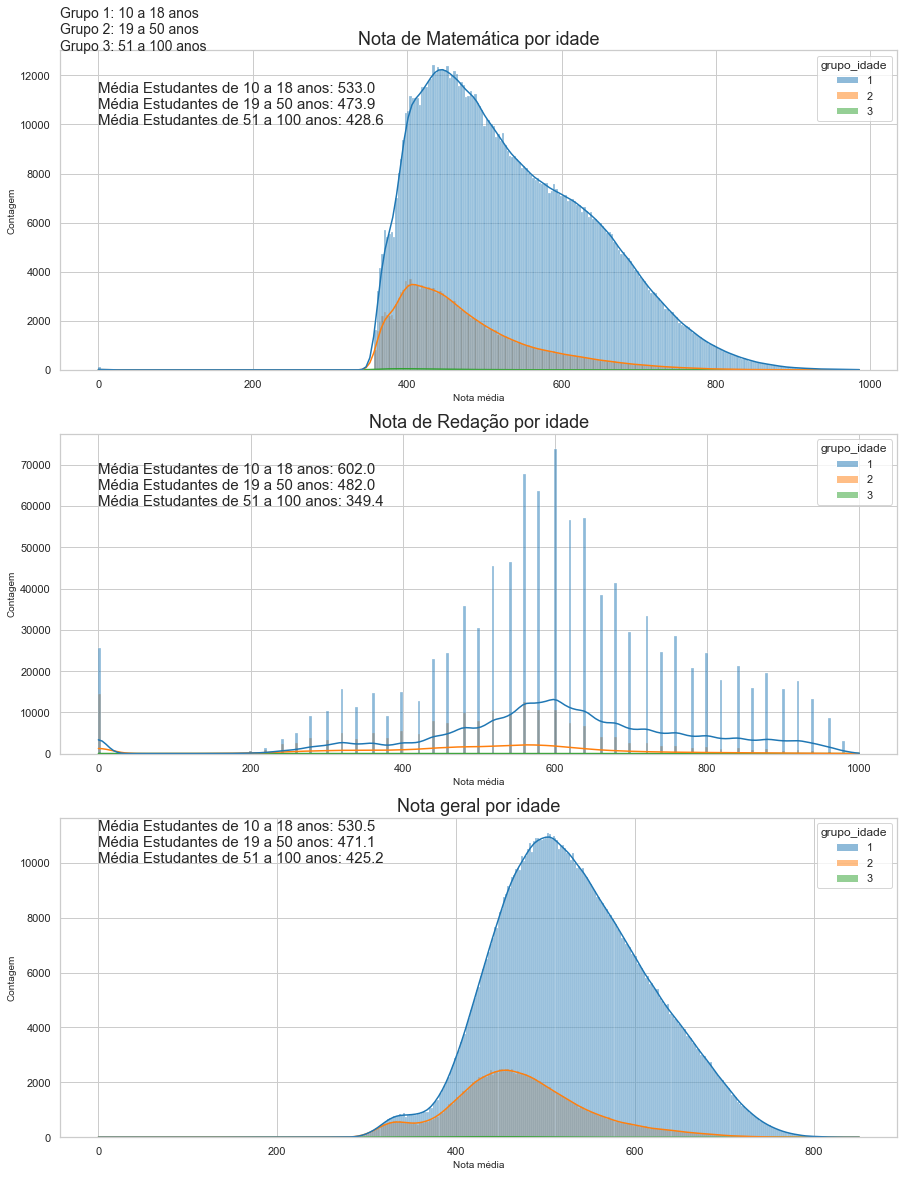

In [160]:
#Vamos calcular a média das notas para inserir no nosso gráfico
matematica = Enem_filtrado_idade.groupby('grupo_idade').mean()['NU_NOTA_MT']
redacao = Enem_filtrado_idade.groupby('grupo_idade').mean()['NU_NOTA_REDACAO']
geral = Enem_filtrado_idade.groupby('grupo_idade').mean()['nota_geral']

#Configurações de visualização
fig, axes = plt.subplots(3,1,figsize=(15,20))


#Configurando o gráfico
ax1 = sns.histplot(ax=axes[0],
                 x='NU_NOTA_MT',
                 data = Enem_filtrado_idade,
                 kde=True,
                 hue='grupo_idade',
                 hue_order= ['1','2','3']
                )
ax1.set_title('Nota de Matemática por idade', fontsize=18)
ax1.set_xlabel('Nota média', fontsize=10)
ax1.set_ylabel('Contagem', fontsize=10)
ax1.annotate(text='Média Estudantes de 10 a 18 anos: {:.1f} \nMédia Estudantes de 19 a 50 anos: {:.1f} \nMédia Estudantes de 51 a 100 anos: {:.1f}'.format(matematica[0], matematica[1], matematica[2]),
             xy=(0, 10000),
             fontsize=15,
             )
ax1.text(0,1, "Grupo 1: 10 a 18 anos \nGrupo 2: 19 a 50 anos \nGrupo 3: 51 a 100 anos", transform=ax1.transAxes, fontsize=14)

ax2 = sns.histplot(ax=axes[1],
                 x='NU_NOTA_REDACAO',
                 data= Enem_filtrado_idade,
                 kde=True,
                 hue='grupo_idade',
                 hue_order= ['1','2','3']
                )
ax2.set_title('Nota de Redação por idade', fontsize=18)
ax2.set_xlabel('Nota média', fontsize=10)
ax2.set_ylabel('Contagem', fontsize=10)
ax2.annotate(text='Média Estudantes de 10 a 18 anos: {:.1f} \nMédia Estudantes de 19 a 50 anos: {:.1f} \nMédia Estudantes de 51 a 100 anos: {:.1f}'.format(redacao[0], redacao[1], redacao[2]),
             xy=(0, 60000),
             fontsize=15,
             )


ax3 = sns.histplot(ax=axes[2],
                 x='nota_geral',
                 data = Enem_filtrado_idade,
                 kde=True,
                 hue='grupo_idade',
                 hue_order= ['1','2','3']
                )
ax3.set_title('Nota geral por idade', fontsize=18)
ax3.set_xlabel('Nota média', fontsize=10)
ax3.set_ylabel('Contagem', fontsize=10)
ax3.annotate(text='Média Estudantes de 10 a 18 anos: {:.1f} \nMédia Estudantes de 19 a 50 anos: {:.1f} \nMédia Estudantes de 51 a 100 anos: {:.1f}'.format(geral[0], geral[1], geral[2]),
             xy=(0, 10000),
             fontsize=15,
             )


Com as informações que temos e observando o gráfico, fica claro que a maioria dos alunos (candidatos) a fazer a prova estão no grupo 1, sendo este é o grupo que tem as melhores médias nas provas. O que era esperado, já que alunos de até 18 anos, em média, estão terminando o ensino médio e se preparando ativamente para realizar a prova do Enem.

### 4.6 A renda familiar influencia na nota?

In [161]:
print(dicionario_renda_texto)

A: Nenhuma renda
B: Até R$ 998,00
C: De R$ 998,01 até R$ 1.497,00
D: De R$ 1.497,01 até R$ 1.996,00
E: De R$ 1.996,01 até R$ 2.495,00
F: De R$ 2.495,01 até R$ 2.994,00
G: De R$ 2.994,01 até R$ 3.992,0
H: De R$ 3.992,01 até R$ 4.990,00
I: De R$ 4.990,01 até R$ 5.988,00
J: De R$ 5.988,01 até R$ 6.986,00
K: De R$ 6.986,01 até R$ 7.984,00
L: De R$ 7.984,01 até R$ 8.982,00
M: De R$ 8.982,01 até R$ 9.980,00
N: De R$ 9.980,01 até R$ 11.976,00
O: De R$ 11.976,01 até R$ 14.970,00
P: De R$ 14.970,01 até R$ 19.960,00
Q: Mais de R$ 19.960,00



Text(0, 0.5, 'Nota média')

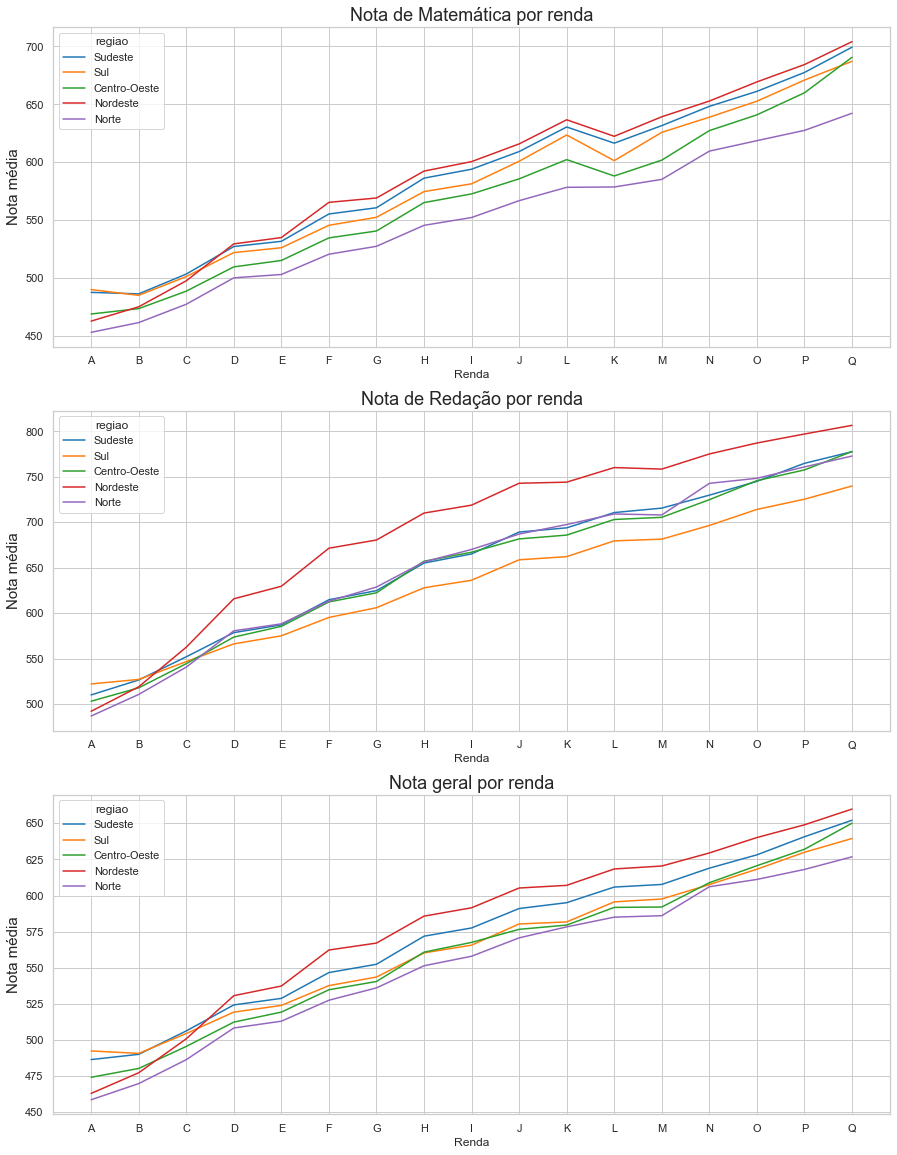

In [162]:
#Configurações de visualização
fig, axes = plt.subplots(3,1,figsize=(15,20))

#Manipulando um dataframe para usarmos
a = data_matematica.groupby(['Q006', 'regiao'])\
    .mean().sort_values(by='NU_NOTA_MT', ascending=True)

b = data_REDACAO.groupby(['Q006', 'regiao'])\
    .mean().sort_values(by='NU_NOTA_REDACAO', ascending=True)

c = data_geral.groupby(['Q006', 'regiao'])\
    .mean().sort_values(by='nota_geral', ascending=True)

#Configurando o gráfico
ax1 = sns.lineplot(ax=axes[0],
                 x='Q006',
                 y='NU_NOTA_MT',
                 data = a,
                 hue='regiao',
                 hue_order=['Sudeste', 'Sul', 'Centro-Oeste', 'Nordeste', 'Norte'],
                 ci=None,
                )
ax1.set_title('Nota de Matemática por renda', fontsize=18)
ax1.set_xlabel('Renda', fontsize=12)
ax1.set_ylabel('Nota média', fontsize=15) 

ax2 = sns.lineplot(ax=axes[1],
                 x='Q006',
                 y='NU_NOTA_REDACAO',
                 data = b,
                 hue='regiao',
                 hue_order=['Sudeste', 'Sul', 'Centro-Oeste', 'Nordeste', 'Norte'],
                 ci=None,
                )
ax2.set_title('Nota de Redação por renda', fontsize=18)
ax2.set_xlabel('Renda', fontsize=12)
ax2.set_ylabel('Nota média', fontsize=15) 

ax3 = sns.lineplot(ax=axes[2],
                 x='Q006',
                 y='nota_geral',
                 data = c,
                 hue='regiao',
                 hue_order=['Sudeste', 'Sul', 'Centro-Oeste', 'Nordeste', 'Norte'],
                 ci=None,
                )
ax3.set_title('Nota geral por renda', fontsize=18)
ax3.set_xlabel('Renda', fontsize=12)
ax3.set_ylabel('Nota média', fontsize=15) 


Este é, talvez, um dos achados mais interessantes e até alarmantes (devo dizer) da nossa análise. Fica claro que quanto maior a renda da família, maior a nota média que os candidatos conseguem. Isso se deve a um conjunto de fatores socioculturais em que o Brasil está inserido e representa uma realidade que  perpetua a diferença de classes. Afinal, se você tiver dinheiro, tem mais chances de conseguir as melhores vagas, segundo nossa análise.

### 4.7 Acesso à internet influencia na nota?

Text(0, 8000, 'Média Estudantes que não tem internet: 476.3 \nMédia Estudantes que tem internet: 533.3')

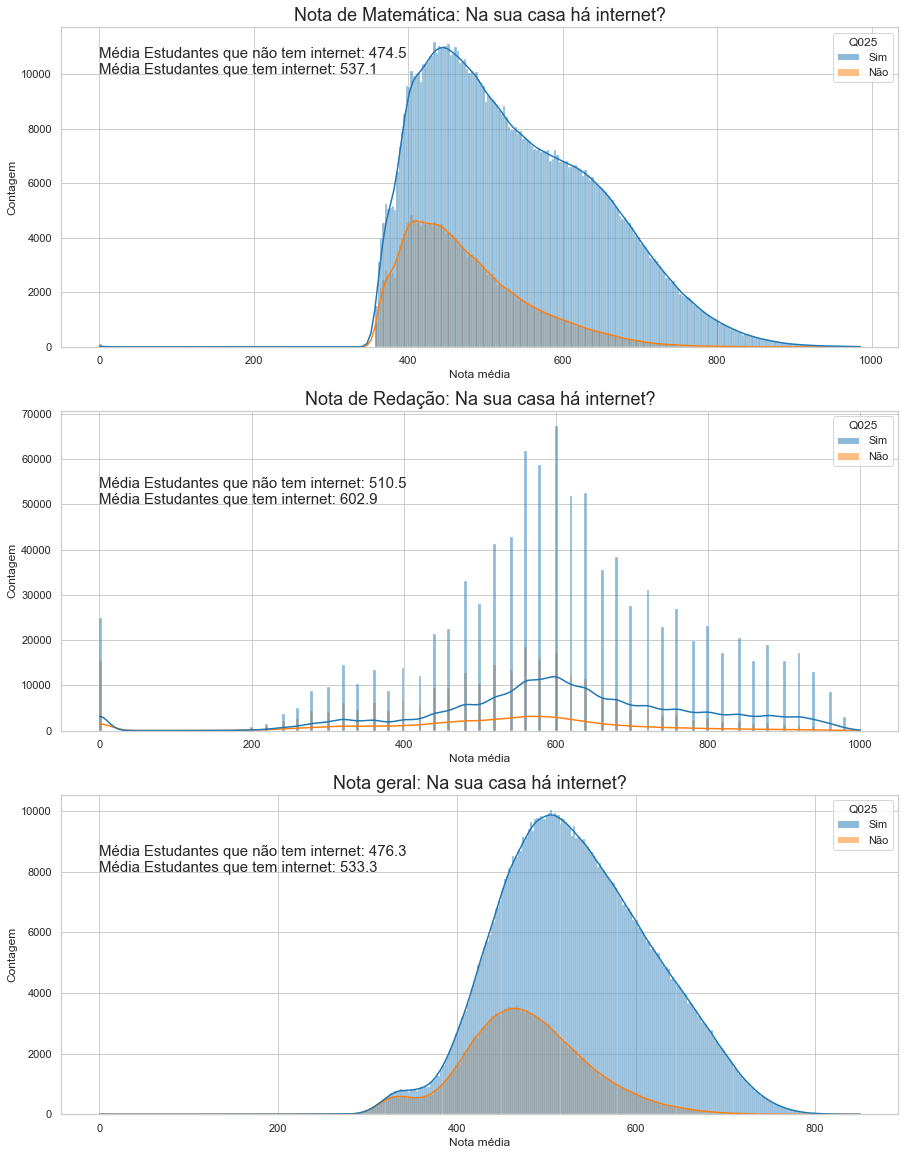

In [163]:
#Vamos calcular a média das notas para inserir no nosso gráfico
matematica = Enem_filtrado.groupby('Q025').mean()['NU_NOTA_MT']
redacao = Enem_filtrado.groupby('Q025').mean()['NU_NOTA_REDACAO']
geral = Enem_filtrado_idade.groupby('Q025').mean()['nota_geral']

#Configurações de visualização
fig, axes = plt.subplots(3,1,figsize=(15,20))


#Configurando o gráfico
ax1 = sns.histplot(ax=axes[0],
                 x='NU_NOTA_MT',
                 data = Enem_filtrado[['NU_NOTA_MT','Q025',]],
                 kde=True,
                 hue='Q025',
                )
ax1.set_title('Nota de Matemática: Na sua casa há internet?', fontsize=18)
ax1.set_xlabel('Nota média', fontsize=12)
ax1.set_ylabel('Contagem', fontsize=12)
ax1.annotate(text='Média Estudantes que não tem internet: {:.1f} \nMédia Estudantes que tem internet: {:.1f}'.format(matematica[0], matematica[1]),
             xy=(0, 10000),
             fontsize=15,
             )

ax2 = sns.histplot(ax=axes[1],
                 x='NU_NOTA_REDACAO',
                 data= Enem_filtrado[['NU_NOTA_REDACAO','Q025']],
                 kde=True,
                 hue='Q025',
                )
ax2.set_title('Nota de Redação: Na sua casa há internet?', fontsize=18)
ax2.set_xlabel('Nota média', fontsize=12)
ax2.set_ylabel('Contagem', fontsize=12)
ax2.annotate(text='Média Estudantes que não tem internet: {:.1f} \nMédia Estudantes que tem internet: {:.1f}'.format(redacao[0], redacao[1]),
             xy=(0, 50000),
             fontsize=15,
             )


ax3 = sns.histplot(ax=axes[2],
                 x='nota_geral',
                 data = Enem_filtrado[['nota_geral','Q025']],
                 kde=True,
                 hue='Q025',
                )
ax3.set_title('Nota geral: Na sua casa há internet?', fontsize=18)
ax3.set_xlabel('Nota média', fontsize=12)
ax3.set_ylabel('Contagem', fontsize=12)
ax3.annotate(text='Média Estudantes que não tem internet: {:.1f} \nMédia Estudantes que tem internet: {:.1f}'.format(geral[0], geral[1]),
             xy=(0, 8000),
             fontsize=15,
             )

Percebemos que os estudantes que possuem internet em casa tem notas maiores do que os que não tem. O fato de ter acesso á internet possibilita ao aluno grande acervo de material online para estudar e praticar.

Mas, quem são as pessoas que não tem acesso à internet?

In [164]:
# Vamos anlisar o número de pessoas com e sem internet por região
sem_internet = Enem_filtrado.groupby(by='regiao')['Q025'].value_counts()
sem_internet

regiao        Q025
Centro-Oeste  Sim      86100
              Não      16607
Nordeste      Sim     263164
              Não     125704
Norte         Sim      63289
              Não      50537
Sudeste       Sim     417746
              Não      48665
Sul           Sim     132489
              Não      12853
Name: Q025, dtype: int64

In [165]:
# Vamos ver em termos de porcentagem
sem_internet_centro_oeste = sem_internet[1]/(sem_internet[0]+sem_internet[1])
sem_internet_nordeste = sem_internet[3]/(sem_internet[2]+sem_internet[3])
sem_internet_norte = sem_internet[5]/(sem_internet[4]+sem_internet[5])
sem_internet_sudeste = sem_internet[7]/(sem_internet[6]+sem_internet[7])
sem_internet_sul = sem_internet[9]/(sem_internet[8]+sem_internet[9])

print('{:.2f} pessoas não tem internet no Centro-Oeste, o que corresponde a {:.2f} % dos alunos que fizeram a prova dessa região'.format(sem_internet[1], sem_internet_centro_oeste*100))
print('{:.2f} pessoas não tem internet no Nordeste, o que corresponde a {:.2f} % dos alunos que fizeram a prova dessa região'.format(sem_internet[3], sem_internet_nordeste*100))
print('{:.2f} pessoas não tem internet no Norte, o que corresponde a {:.2f} % dos alunos que fizeram a prova dessa região'.format(sem_internet[5], sem_internet_norte*100))
print('{:.2f} pessoas não tem internet no Sudeste, o que corresponde a {:.2f} % dos alunos que fizeram a prova dessa região'.format(sem_internet[7], sem_internet_sudeste*100))
print('{:.2f} pessoas não tem internet no Sul, o que corresponde a {:.2f} % dos alunos que fizeram a prova dessa região'.format(sem_internet[9], sem_internet_sul*100))

16607.00 pessoas não tem internet no Centro-Oeste, o que corresponde a 16.17 % dos alunos que fizeram a prova dessa região
125704.00 pessoas não tem internet no Nordeste, o que corresponde a 32.33 % dos alunos que fizeram a prova dessa região
50537.00 pessoas não tem internet no Norte, o que corresponde a 44.40 % dos alunos que fizeram a prova dessa região
48665.00 pessoas não tem internet no Sudeste, o que corresponde a 10.43 % dos alunos que fizeram a prova dessa região
12853.00 pessoas não tem internet no Sul, o que corresponde a 8.84 % dos alunos que fizeram a prova dessa região


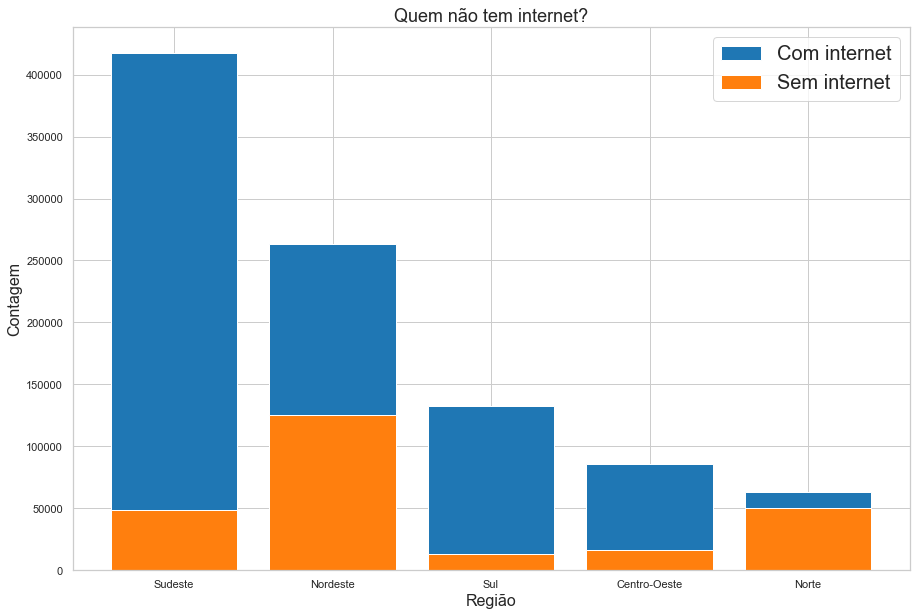

In [166]:
#Criando os dataframes para formarmos o gráfico

data_sem_internet = Enem_filtrado[Enem_filtrado['Q025'] == 'Não']
data_sem_internet = data_sem_internet['regiao'].value_counts()

data_com_internet = Enem_filtrado[Enem_filtrado['Q025'] == 'Sim']
data_com_internet = data_com_internet['regiao'].value_counts()

# Configurando o gráfico
fig = plt.figure(figsize=(15,10))
plt.bar(x=data_com_internet.index,height=data_com_internet.values, label='Com internet')
plt.bar(x=data_sem_internet.index,height=data_sem_internet.values, label='Sem internet')
plt.legend(fontsize=20)
plt.title('Quem não tem internet?',fontsize=18)
plt.xlabel('Região', fontsize=16)
plt.ylabel('Contagem', fontsize=16)
plt.show()

Percebemos que a região norte está em grande desfalque quando o assunto é acesso à internet, o que pode ser explicado devido a limitações logísticas. Já a região Sul é a que apresenta melhor acesso à internet proporcionalmente de todo Braisl.

### 4.8 A quantidades de resientes na casa influencia na nota?

Text(0, 0.5, 'Nota média')

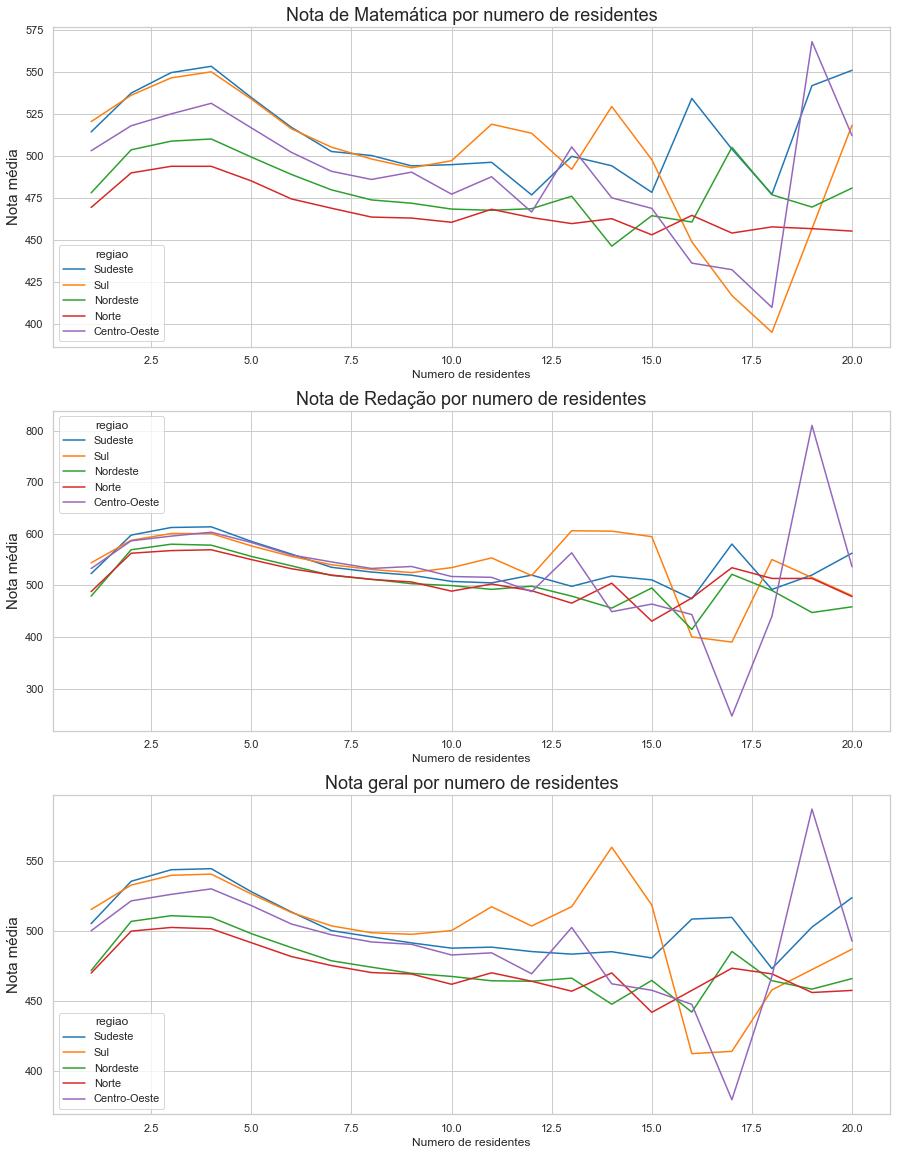

In [167]:
#Configurações de visualização
fig, axes = plt.subplots(3,1,figsize=(15,20))

#Manipulando um dataframe para usarmos
data_matematica = Enem_filtrado[['NU_NOTA_MT', 'Q005', 'regiao']]
data_REDACAO = Enem_filtrado[['NU_NOTA_REDACAO', 'Q005', 'regiao']]
data_geral = Enem_filtrado[['nota_geral', 'Q005', 'regiao']]

a = data_matematica.groupby(['Q005'])\
    .mean().sort_values(by='NU_NOTA_MT', ascending=True)

b = data_REDACAO.groupby(['Q005'])\
    .mean().sort_values(by='NU_NOTA_REDACAO', ascending=True)

c = data_geral.groupby(['Q005'])\
    .mean().sort_values(by='nota_geral', ascending=True)

#Configurando o gráfico
ax1 = sns.lineplot(ax=axes[0],
                 x='Q005',
                 y='NU_NOTA_MT',
                 data = data_matematica,
                 hue='regiao',
                 ci=None,
                )
ax1.set_title('Nota de Matemática por numero de residentes', fontsize=18)
ax1.set_xlabel('Numero de residentes', fontsize=12)
ax1.set_ylabel('Nota média', fontsize=15) 

ax2 = sns.lineplot(ax=axes[1],
                 x='Q005',
                 y='NU_NOTA_REDACAO',
                 data = data_REDACAO,
                 hue='regiao',
                 ci=None,
                )
ax2.set_title('Nota de Redação por numero de residentes', fontsize=18)
ax2.set_xlabel('Numero de residentes', fontsize=12)
ax2.set_ylabel('Nota média', fontsize=15) 

ax3 = sns.lineplot(ax=axes[2],
                 x='Q005',
                 y='nota_geral',
                 data =data_geral,
                 hue='regiao',
                 ci=None,
                )
ax3.set_title('Nota geral por numero de residentes', fontsize=18)
ax3.set_xlabel('Numero de residentes', fontsize=12)
ax3.set_ylabel('Nota média', fontsize=15) 


Em um primeiro momento percebemos que as notas caem à medida que o número de residentes vai aumentando, o que é o esperado devido a fatores sociais: Mais pessoas geralmente está relacionado a baixa renda, onde as crianças tem que trabalhar junto dos pais. Todavia, curiosamente, quando o número de residentes passa de 12, algumas notas começam a aumentar abruptamente. 
Este é um efeito que merece mais atenção e estudo. Por enquanto, somente suposições podem ser levantadas: A partir de 12 pessoas são respostas provenientes de estudantes que moram em repúblicas estudantis? Ou será que foram respostas equivocadas? 

# 5. Análises gerais
Vamos nos utilizar de recursos para compreender melhor os dados no nosso contexto histórico, social e geográfico, bem como a relação que eles possuem entre si.

### Correlação

Text(0.5, 1.0, 'Mapa de calor: Correlação dos dados')

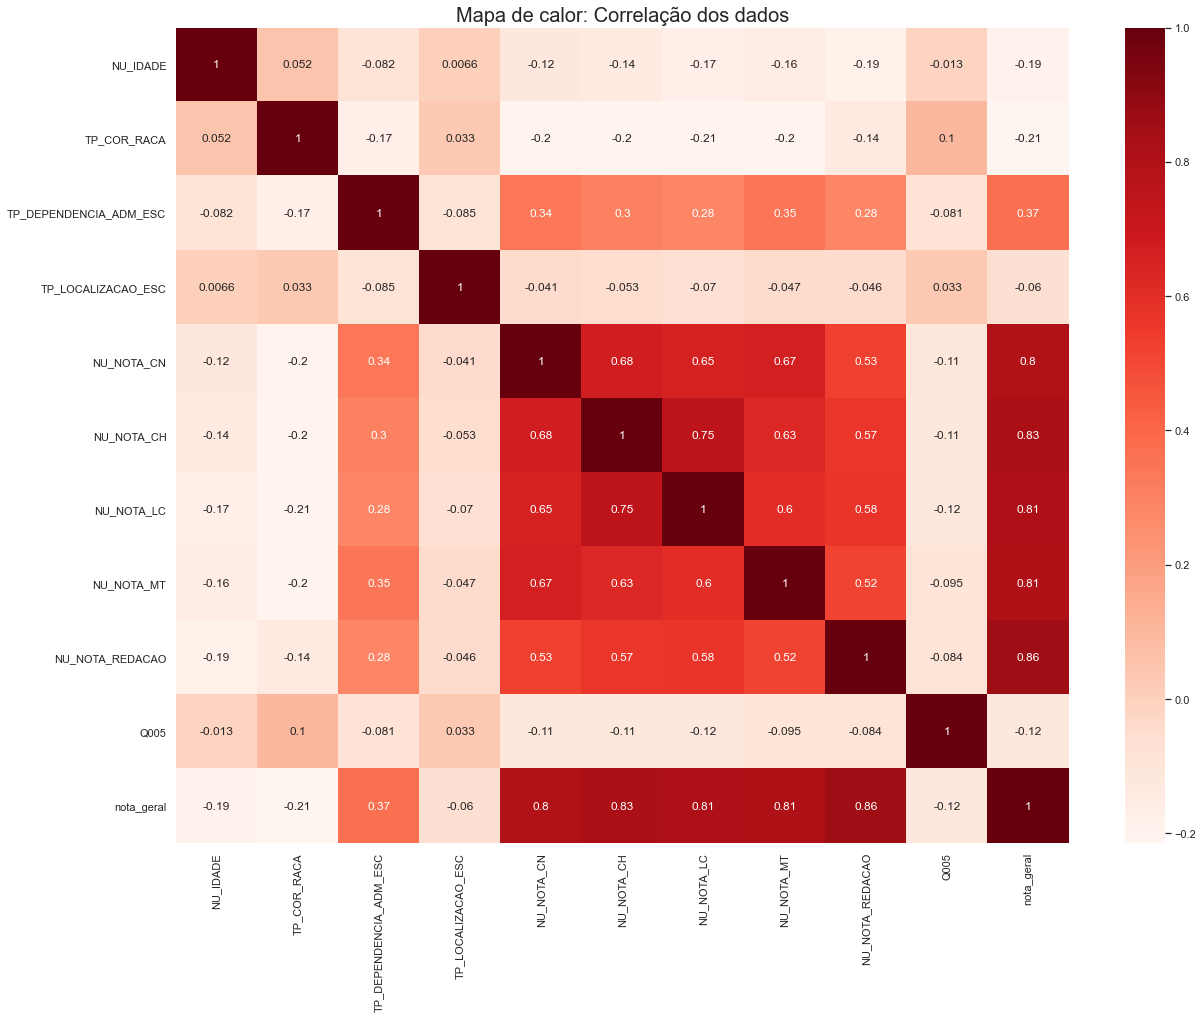

In [168]:
# Criando a matriz de correlação
cor = Enem_filtrado.corr()

# Configurando a visualização do mapa de calor.
plt.figure(figsize=(20,15))
ax =sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
ax.set_title('Mapa de calor: Correlação dos dados', fontsize=20)

Aqui, vemos cada uma das variáveis e seu nível de correlação com as demais. (Análises mais detalhadas no Relatório em PDF)



### Visualização espacial
Agora vamos analisar as informações de uma maneira mais visual, nos utilizando dos dados de código de município presentes no nosso dataframe "Enem". Para isso, vamos importar outro dataset que relaciona a informação de código do município (usado pelo Enem), com informações geográficas. Utilizamos os dados provenientes de: https://github.com/kelvins/Municipios-Brasileiros

In [169]:
#Criando um Dataframe do dataset "municipios"
municipios = pd.read_csv("./DADOS/municipios.csv")

#Filtrando o dataframe para as features que precisamos
municipios_filtrado = municipios[['codigo_ibge','nome','latitude','longitude']]

#Dando uma olhada nos dados
info(municipios_filtrado)

DATASET SHAPE:  (5570, 4) 

--------------------------------------------------
TIPOS DE DADOS POR FEATURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   codigo_ibge  5570 non-null   int64  
 1   nome         5570 non-null   object 
 2   latitude     5570 non-null   float64
 3   longitude    5570 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 174.2+ KB
None

 --------------------------------------------------
NÚMERO DE VALORES ÚNICOS POR FEATURE 

codigo_ibge    5570
nome           5299
latitude       5526
longitude      5476
dtype: int64

 --------------------------------------------------
VALORES NULOS POR FEATURE
longitude      0
latitude       0
nome           0
codigo_ibge    0
dtype: int64

 --------------------------------------------------
ESTATÍSTICAS BÁSICAS
        codigo_ibge     latitude    longitude
c

Temos um dataframe com 5570 linhas, 4 colunas e nenhum valor nulo.

Agora, vamos juntar as informações de "municipios", com as que ja temos.

In [170]:
# Selecionando as features que já temos
Enem_selecionado = Enem_filtrado[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','nota_geral']]

# Adicionando a informação de código do município
Enem_selecionado['CO_MUNICIPIO_RESIDENCIA'] = Enem['CO_MUNICIPIO_RESIDENCIA']

# Juntando os dois dataframes
Enem_selecionado_merge = pd.merge(Enem_selecionado, municipios_filtrado,
                                 how='left', left_on=['CO_MUNICIPIO_RESIDENCIA'],
                                 right_on=['codigo_ibge'])

In [171]:
# Agora temos as informações juntas em um dataframe
Enem_selecionado_merge.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,nota_geral,CO_MUNICIPIO_RESIDENCIA,codigo_ibge,nome,latitude,longitude
0,543.9,548.1,502.5,480.7,400.0,495.04,3550308,3550308,São Paulo,-23.5329,-46.6395
1,618.2,744.7,636.3,713.7,900.0,722.58,4101408,4101408,Apucarana,-23.5500,-51.4635
2,430.4,466.8,515.9,394.1,580.0,477.44,4300604,4300604,Alvorada,-29.9914,-51.0809
3,371.8,501.4,518.6,442.0,660.0,498.76,3523107,3523107,Itaquaquecetuba,-23.4835,-46.3457
4,567.3,584.1,595.8,704.5,620.0,614.34,2919207,2919207,Lauro de Freitas,-12.8978,-38.3210


Text(0, 0.5, '')

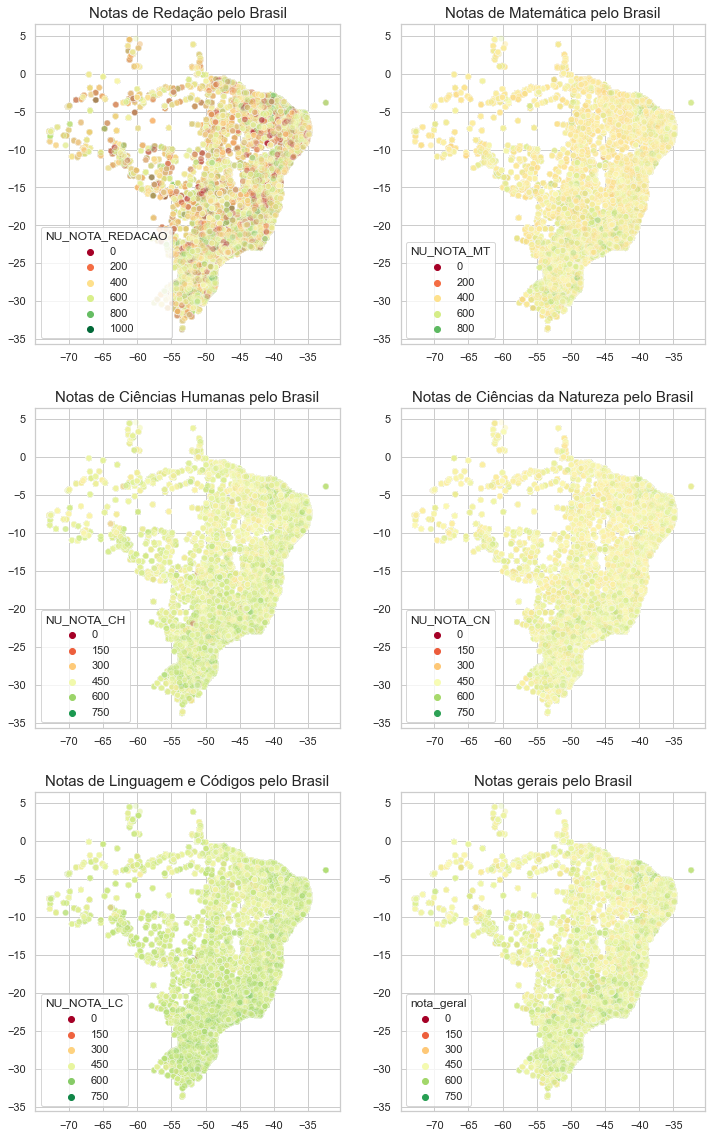

In [172]:
#Configurações de visualização
fig, axes = plt.subplots(3,2,figsize=(12,20))

#Configurando o gráfico
ax1 = sns.scatterplot(ax=axes[0,0],
                    x='longitude',
                    y='latitude', data = Enem_selecionado_merge,
                    hue='NU_NOTA_REDACAO',
                    palette=plt.get_cmap('RdYlGn_r').reversed(),
                    alpha=0.3)

ax1.set_title('Notas de Redação pelo Brasil', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('')  

ax2 = sns.scatterplot(ax=axes[0,1],
                    x='longitude',
                    y='latitude', data = Enem_selecionado_merge,
                    hue='NU_NOTA_MT',
                    palette=plt.get_cmap('RdYlGn_r').reversed(),
                    alpha=0.3)

ax2.set_title('Notas de Matemática pelo Brasil', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('')  

ax3 = sns.scatterplot(ax=axes[1,0],
                    x='longitude',
                    y='latitude', data = Enem_selecionado_merge,
                    hue='NU_NOTA_CH',
                    palette=plt.get_cmap('RdYlGn_r').reversed(),
                    alpha=0.3)

ax3.set_title('Notas de Ciências Humanas pelo Brasil', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('')  

ax4 = sns.scatterplot(ax=axes[1,1],
                    x='longitude',
                    y='latitude', data = Enem_selecionado_merge,
                    hue='NU_NOTA_CN',
                    palette=plt.get_cmap('RdYlGn_r').reversed(),
                    alpha=0.3)

ax4.set_title('Notas de Ciências da Natureza pelo Brasil', fontsize=15)
ax4.set_xlabel('')
ax4.set_ylabel('') 

ax5 = sns.scatterplot(ax=axes[2,0],
                    x='longitude',
                    y='latitude', data = Enem_selecionado_merge,
                    hue='NU_NOTA_LC',
                    palette=plt.get_cmap('RdYlGn_r').reversed(),
                    alpha=0.3)

ax5.set_title('Notas de Linguagem e Códigos pelo Brasil', fontsize=15)
ax5.set_xlabel('')
ax5.set_ylabel('') 

ax6 = sns.scatterplot(ax=axes[2,1],
                    x='longitude',
                    y='latitude', data = Enem_selecionado_merge,
                    hue='nota_geral',
                    palette=plt.get_cmap('RdYlGn_r').reversed(),
                    alpha=0.3)

ax6.set_title('Notas gerais pelo Brasil', fontsize=15)
ax6.set_xlabel('')
ax6.set_ylabel('') 

A partir da análise dos gráficos, conseguimos perceber que, quando se comparam as áreas de conhecimento, Ciências Humanas e Linguagens e códigos apresentam muito menos pontos vermelhos do que matemática e redação.

Já quando o objeto de comaração são as regiões brasileiras, fica evidence como a região sudeste tem as melhores notas, em comparaçaõ com as outras regiões, em todas as áreas de conhecimento.

O gráfico de nota geral pelo Brasil evidencia como as notas são maiores na regisão Sudeste. 

# Machine Learning 

Agora vamos aplicar alguams tecnicas de aprendizado de máruina para nos ajudar a compreender ainda mais os dados e tentar prever situações futuras.

In [173]:
# Importanto todos os módulos que iremos usar nesta etap
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

In [174]:
# Vamos utilizar somente algumas variáveis que temos acesso antes do aluno afzer a prova, para replicar uma situação real.
dados_modelo = Enem[['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'Q001', 'Q002', 'Q005', 'Q006', 'Q025']]
dados_modelo['nota_geral'] = Enem_filtrado['nota_geral']

# Caso quiséssemos usar as notas em cada área do conhecimento, basta executar o código abaixo
# dados_modelo = Enem_filtrado
# Dessa maneira, conseguiríamos um modelo com métricas muito melhores.

# Como iremos performar uma regressão, temos que eliminar todas as linahs que possuem
# valores nulos.
dados_modelo = dados_modelo.dropna()

#Criando as variáeis "dummies". Uma representação numérica das varáveis categóricas.
dados_modelo = pd.get_dummies(dados_modelo, drop_first=True)


In [175]:
# Configuramos nossos dados de entrada e saída desejada que queremos para o modelo.
X = dados_modelo.drop("nota_geral", axis=1)
y = dados_modelo["nota_geral"]

# Optamos por normalizar os dados pois as features tem escalas muito diferentes. 
passos = [('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Configuramos os passos que queremos o nosso pipeline executando. Como tratamos os dados, 
# não colocamos nenhuma etapa de Limpeza ou tratamento de dados no pipeline.
pipeline = Pipeline(passos)

# Especificamos o parâmetro que queremos testar. No caso da ElasticNet, 
# o parâmetro que queremos é o "l1_ratio".
parametros = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Criamos as divisões de treino e teste dos nossos dados.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Utilizamos o GridSearchCV para criar um "grid" dos possíveis valores de l1_ratio que queremos 
# testar na etapa de validação cruzada. 
gm_cv = GridSearchCV(pipeline, param_grid=parametros)

# Aplicamos o método fit nos dados de treino
gm_cv.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__l1_ratio': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])})

In [176]:
# Computando e printando as métricas
r2 = gm_cv.score(X_test, y_test)

print("Melhor parâmetro achado para o modelo: {}".format(gm_cv.best_params_))
print("R^2 do modelo: {}".format(r2))

# Executando uma previsão dos dados, para obtermos os resultados e computarmos as métricas.
y_pred = gm_cv.predict(X_test)

# Erro quadrático médio. 
MSE = mean_squared_error(y_test, y_pred)

# Raiz do erro médio quadrático.
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print("MSE do modelo: {}".format(MSE))
print("RMSE do modelo: {}".format(RMSE))

Melhor parâmetro achado para o modelo: {'elasticnet__l1_ratio': 1.0}
R^2 do modelo: 0.34101552840137983
MSE do modelo: 4887.352664995667
RMSE do modelo: 69.90960352480671


O modelo obteve r^2 de 0.341, o que é considerado baixo para prever a nota de um candidato. 
O erro quadrático médio (MSE) pega a diferença entre o valor predito pelo modelo e o valor real, eleva o resultado ao quadrado e divide pelo número de elementos preditos. O MSE foi de 4887 e se mostrou alto, mesmo em uma tarefa para prever algo com não tanta precisão.

A raiz do erro médio quadrático (RMSE) executa o que o nome diz, faz a raiz do MSE e foi de 69. Isso se dá, pois a unidade de medida do MSE é de difícil interpretação (já que está elevada ao quadrado). No RMSE, a interpretação melhora, já que agora temos a mesma unidade de medida. Em outras palavras, com um RMSE de 69 aproximadamente, queremos dizer que a média do erro de previsão que o nosso modelo obteve foi de 69 pontos na prova do Enem, o que é considerável, principalmente para testes e início de planejamento de campanhas públicas.

Este modelo, juntamente com o aprendizado obtido lendo este relatório, pode ser utilizado por tomadores de decisão, políticos, professores e outros interessados para simular as possíveis notas de seus alunos e obter insights, como: Quais cursos possuem a nota de corte adequada, que regiões possivelmente obterão notas menores, quais alunos priorizar e suportar mais, que tipo de investimento é necessário e em qual parte da cidade, etc.

Neste modelo, a tentativa é simular uma situação real onde o tomador de decisão só tem disponíveis dados socioeconômicos, mas caso queiramos utilizar as notas nas áreas específicas para estimar a nota final do candidato, podemos as incluir em nosso modelo e obteremos um modelo com r^2 de 0.99, MSE de 1.47 e RMSE de 1.21, o que é considerado extremamente bom, e pode ainda ser utilizado por estudantes que queiram ter um vislumbre de sua nota no Enem para saber qual faculdade, curso e nota de corte podem optar.

O gráfico abaixo faz uma relação dos primeiros 100 valores reais e 

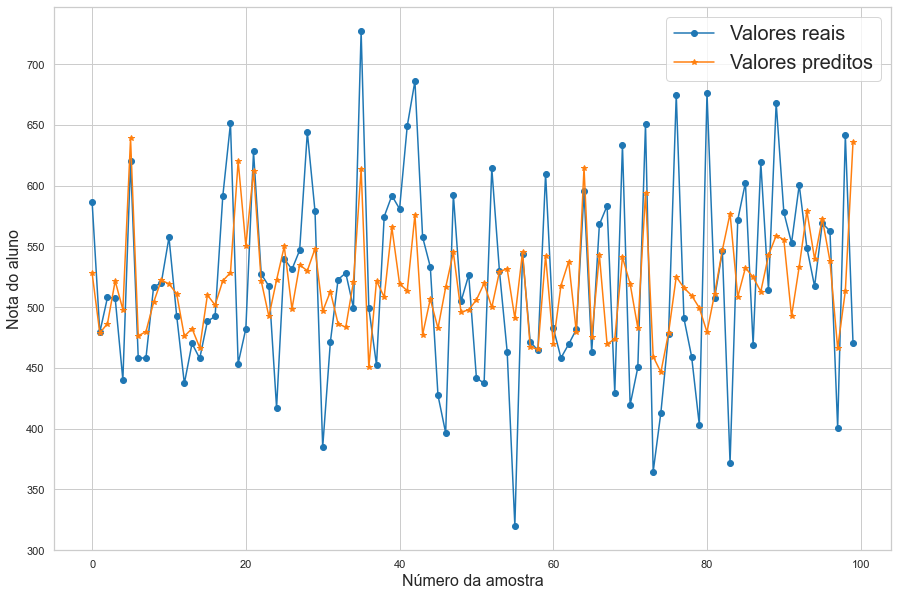

In [177]:
a = y_test.head(100)
a = a.reset_index(drop=True)
b = y_pred[0:100]

fig = plt.figure(figsize=(15,10))
plt.plot(a, label = "Valores reais", marker='o')
plt.plot(b, label = "Valores preditos", marker='*')
plt.legend(fontsize=20)
plt.xlabel('Número da amostra', fontsize=16)
plt.ylabel('Nota do aluno', fontsize=16)
plt.show()